In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import *
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.integrate import simps
import warnings
import scipy.stats
import pywt

In [2]:
#Reading the CGMTimeSeries and CGMData for patient 1 using pandas library

#Cell arrays for patient 1
CGMTimeSeries = pd.read_csv("Desktop/DataFolder/CGMDatenumLunchPat1.csv")
CGMData_b = pd.read_csv("Desktop/DataFolder/CGMSeriesLunchPat1.csv")
InsulinBasal = pd.read_csv("Desktop/DataFolder/InsulinBasalLunchPat1.csv")
InsulinBolus = pd.read_csv("Desktop/DataFolder/InsulinBolusLunchPat1.csv")
InsulinTimeSeries = pd.read_csv("Desktop/DataFolder/InsulinDateNumLunchPat1.csv")

#Cell arrays for Patient 2
CGMTimeSeries_2 = pd.read_csv("Desktop/DataFolder/CGMDatenumLunchPat2.csv")
CGMData_b_2 = pd.read_csv("Desktop/DataFolder/CGMSeriesLunchPat2.csv")
InsulinBasal_2 = pd.read_csv("Desktop/DataFolder/InsulinBasalLunchPat2.csv")
InsulinBolus_2 = pd.read_csv("Desktop/DataFolder/InsulinBolusLunchPat2.csv")
InsulinTimeSeries_2 = pd.read_csv("Desktop/DataFolder/InsulinDateNumLunchPat2.csv")

#Cell arrays for patient 3
CGMTimeSeries_3 = pd.read_csv("Desktop/DataFolder/CGMDatenumLunchPat3.csv")
CGMData_b_3 = pd.read_csv("Desktop/DataFolder/CGMSeriesLunchPat3.csv")
InsulinBasal_3 = pd.read_csv("Desktop/DataFolder/InsulinBasalLunchPat3.csv")
InsulinBolus_3 = pd.read_csv("Desktop/DataFolder/InsulinBolusLunchPat3.csv")
InsulinTimeSeries_3 = pd.read_csv("Desktop/DataFolder/InsulinDateNumLunchPat3.csv")

#Cell arrays for patient 4
CGMTimeSeries_4 = pd.read_csv("Desktop/DataFolder/CGMDatenumLunchPat4.csv")
CGMData_b_4 = pd.read_csv("Desktop/DataFolder/CGMSeriesLunchPat4.csv")
InsulinBasal_4 = pd.read_csv("Desktop/DataFolder/InsulinBasalLunchPat4.csv")
InsulinBolus_4 = pd.read_csv("Desktop/DataFolder/InsulinBolusLunchPat4.csv")
InsulinTimeSeries_4 = pd.read_csv("Desktop/DataFolder/InsulinDateNumLunchPat4.csv")

#Cell arrays for Patient 5
CGMTimeSeries_5 = pd.read_csv("Desktop/DataFolder/CGMDatenumLunchPat5.csv")
CGMData_b_5 = pd.read_csv("Desktop/DataFolder/CGMSeriesLunchPat5.csv")
InsulinBasal_5 = pd.read_csv("Desktop/DataFolder/InsulinBasalLunchPat5.csv")
InsulinBolus_5 = pd.read_csv("Desktop/DataFolder/InsulinBolusLunchPat5.csv")
InsulinTimeSeries_5 = pd.read_csv("Desktop/DataFolder/InsulinDateNumLunchPat5.csv")

In [3]:
# FIlling NaN values 

# preprocessing to remove NaN for Pat 1
dfd = CGMData_b['cgmSeries_31']
CGMData_b['cgmSeries_31'] = dfd.replace(np.NaN, CGMData_b['cgmSeries_30'] + (CGMData_b['cgmSeries_30'] - CGMData_b['cgmSeries_29']))
CGMTimeSeries['cgmDatenum_31'] = CGMTimeSeries['cgmDatenum_30'] - 0.0035

#CGMTimeSeries_2 = CGMTimeSeries_2.iloc[:,0:31].dropna()
#CGMTimeSeries_3 = CGMTimeSeries_3.iloc[:,0:30].dropna()
#CGMTimeSeries_4 = CGMTimeSeries_4.iloc[:,0:30].dropna()
#CGMTimeSeries_5 = CGMTimeSeries_5.iloc[:,0:30].dropna()

#Patient 1
CGMData_b = CGMData_b.fillna(value=0)
InsulinBasal = InsulinBasal.fillna(value=0)
InsulinBolus = InsulinBolus.fillna(value=0)

#Patient 2
CGMData_b_2 = CGMData_b_2.fillna(value=0)
InsulinBasal_2 = InsulinBasal_2.fillna(value=0)
InsulinBolus_2 = InsulinBolus_2.fillna(value=0)

#Patient 3
CGMData_b_3 = CGMData_b_3.fillna(value=0)
InsulinBasal_3 = InsulinBasal_3.fillna(value=0)
InsulinBolus_3 = InsulinBolus_3.fillna(value=0)

#Patient 4
CGMData_b_4 = CGMData_b_4.fillna(value=0)
InsulinBasal_4 = InsulinBasal_4.fillna(value=0)
InsulinBolus_4 = InsulinBolus_4.fillna(value=0)

#Patient 5
CGMData_b_5 = CGMData_b_5.fillna(value=0)
InsulinBasal_5 = InsulinBasal_5.fillna(value=0)
InsulinBolus_5 = InsulinBolus_5.fillna(value=0)

In [4]:
#Normalize and Scale to fit in 1 graph
scaler = MinMaxScaler([0,1])
#For Patient 1
CGMData = preprocessing.normalize(CGMData_b)
InsulinBolus = preprocessing.normalize(InsulinBolus)
scaled_CGMData = scaler.fit_transform(CGMData)
scaled_Bolus = scaler.fit_transform(InsulinBolus)

#For Patient 2
CGMData_2 = preprocessing.normalize(CGMData_b_2)
InsulinBolus_2 = preprocessing.normalize(InsulinBolus_2)
scaled_CGMData_2 = scaler.fit_transform(CGMData_2)
scaled_Bolus_2 = scaler.fit_transform(InsulinBolus_2)

#For Patient 3
CGMData_3 = preprocessing.normalize(CGMData_b_3)
InsulinBolus_3 = preprocessing.normalize(InsulinBolus_3)
scaled_CGMData_3 = scaler.fit_transform(CGMData_3)
scaled_Bolus_3 = scaler.fit_transform(InsulinBolus_3)

#For Patient 4
CGMData_4 = preprocessing.normalize(CGMData_b_4)
InsulinBolus_4 = preprocessing.normalize(InsulinBolus_4)
scaled_CGMData_4 = scaler.fit_transform(CGMData_4)
scaled_Bolus_4 = scaler.fit_transform(InsulinBolus_4)

#For Patient 5
CGMData_5 = preprocessing.normalize(CGMData_b_5)
InsulinBolus_5 = preprocessing.normalize(InsulinBolus_5)
scaled_CGMData_5 = scaler.fit_transform(CGMData_5)
scaled_Bolus_5 = scaler.fit_transform(InsulinBolus_5)

In [5]:
#Storing the row wise data of all the excel sheets.

#For Patient 1
TimeSeries_byRow = []
CGMData_byRow = []
Basal_byRow = []
Bolus_byRow = []
InsulinTime_byRow = []

for i in range(0,33):
    TimeSeries_byRow.append(CGMTimeSeries.iloc[i])
    CGMData_byRow.append(scaled_CGMData[i])
    Basal_byRow.append(InsulinBasal.iloc[i])
    Bolus_byRow.append(scaled_Bolus[i])
    InsulinTime_byRow.append(InsulinTimeSeries.iloc[i])
    
#For Patient 2

TimeSeries_byRow_2 = []
CGMData_byRow_2 = []
Basal_byRow_2 = []
Bolus_byRow_2 = []
InsulinTime_byRow_2 = []

for i in range(0,38):
    TimeSeries_byRow_2.append(CGMTimeSeries_2.iloc[i])
    CGMData_byRow_2.append(scaled_CGMData_2[i])
    Basal_byRow_2.append(InsulinBasal_2.iloc[i])
    Bolus_byRow_2.append(scaled_Bolus_2[i])
    InsulinTime_byRow_2.append(InsulinTimeSeries_2.iloc[i])
    
#For Patient 3
TimeSeries_byRow_3 = []
CGMData_byRow_3 = []
Basal_byRow_3 = []
Bolus_byRow_3 = []
InsulinTime_byRow_3 = []

for i in range(0,30):
    TimeSeries_byRow_3.append(CGMTimeSeries_3.iloc[i])
    CGMData_byRow_3.append(scaled_CGMData_3[i])
    Basal_byRow_3.append(InsulinBasal_3.iloc[i])
    Bolus_byRow_3.append(scaled_Bolus_3[i])
    InsulinTime_byRow_3.append(InsulinTimeSeries_3.iloc[i])
    
#For Patient 4
TimeSeries_byRow_4 = []
CGMData_byRow_4 = []
Basal_byRow_4 = []
Bolus_byRow_4 = []
InsulinTime_byRow_4 = []

for i in range(0,30):
    TimeSeries_byRow_4.append(CGMTimeSeries_4.iloc[i])
    CGMData_byRow_4.append(scaled_CGMData_4[i])
    Basal_byRow_4.append(InsulinBasal_4.iloc[i])
    Bolus_byRow_4.append(scaled_Bolus_4[i])
    InsulinTime_byRow_4.append(InsulinTimeSeries_4.iloc[i])
    
#For Patient 5

TimeSeries_byRow_5 = []
CGMData_byRow_5 = []
Basal_byRow_5 = []
Bolus_byRow_5 = []
InsulinTime_byRow_5 = []

for i in range(0,18):
    TimeSeries_byRow_5.append(CGMTimeSeries_5.iloc[i])
    CGMData_byRow_5.append(scaled_CGMData_5[i])
    Basal_byRow_5.append(InsulinBasal_5.iloc[i])
    Bolus_byRow_5.append(scaled_Bolus_5[i])
    InsulinTime_byRow_5.append(InsulinTimeSeries_5.iloc[i])

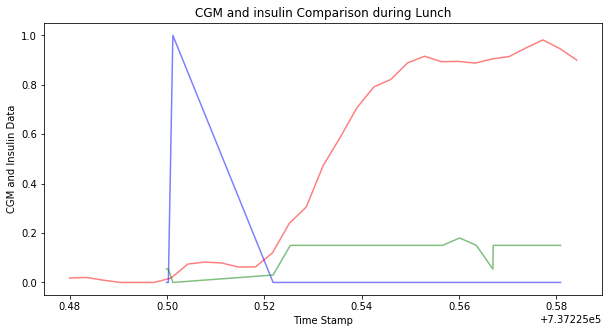

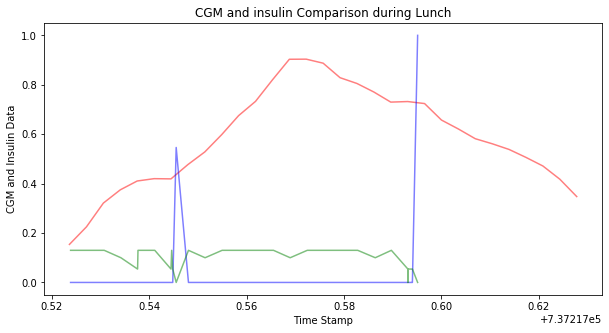

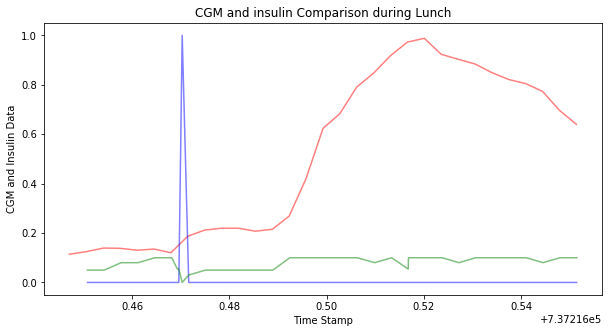

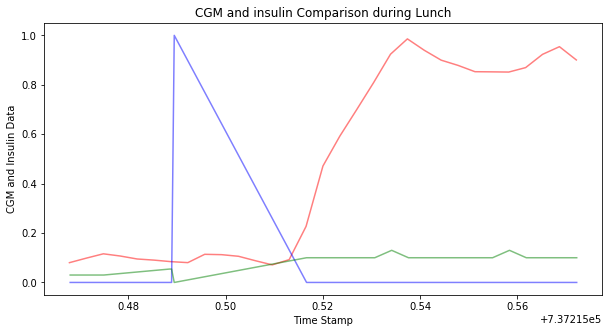

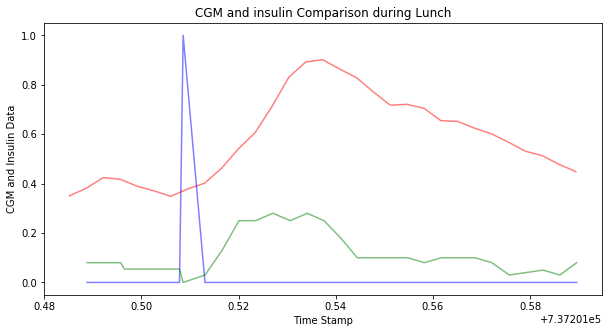

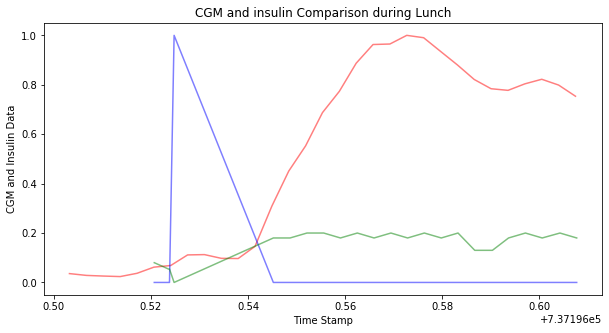

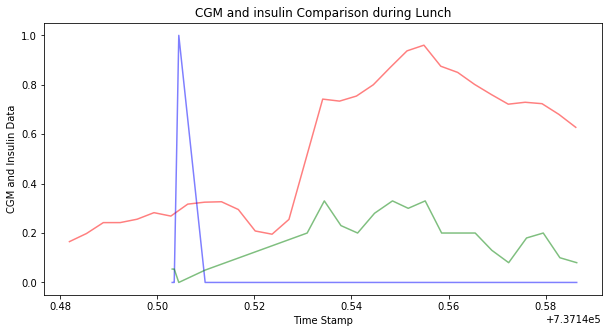

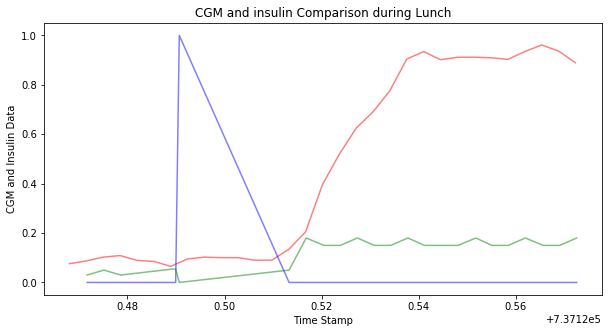

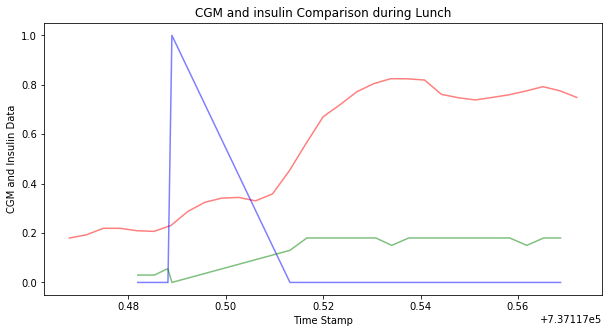

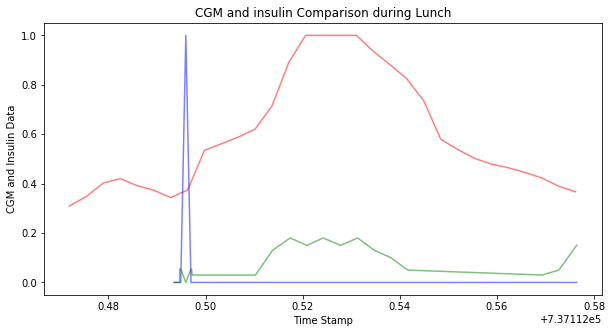

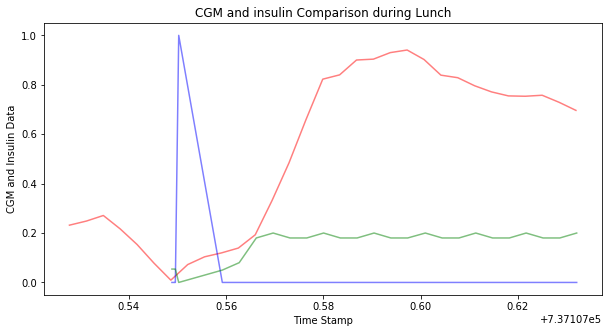

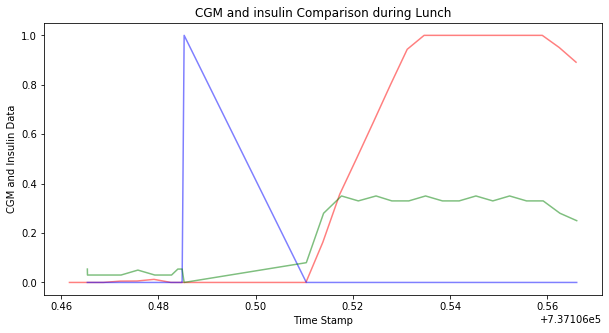

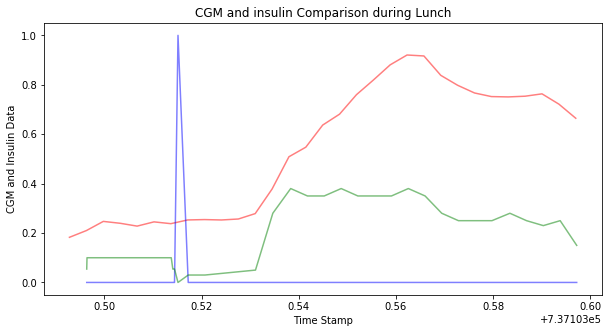

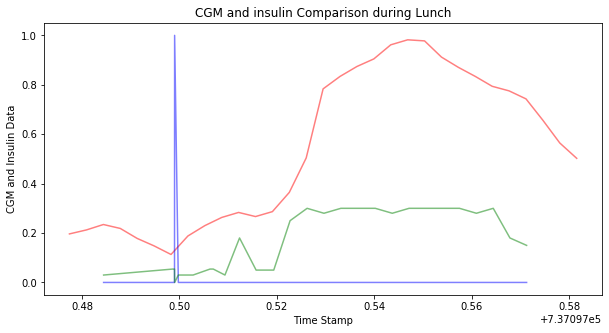

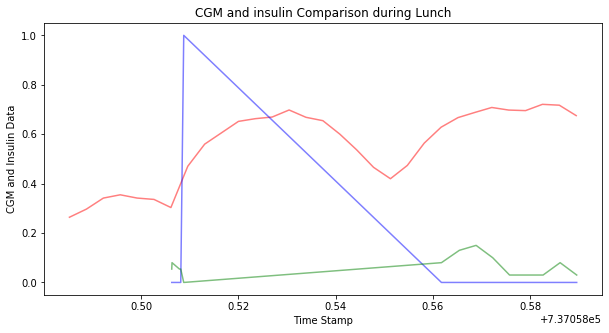

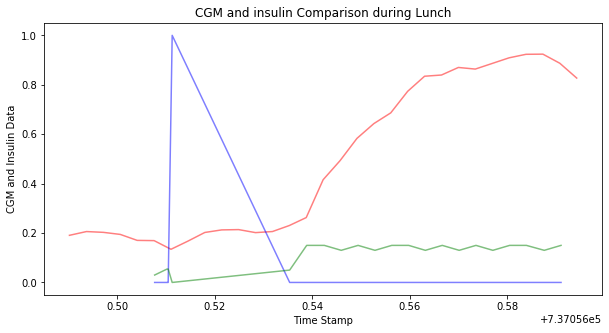

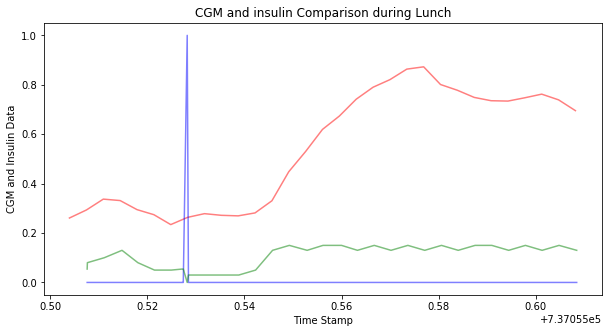

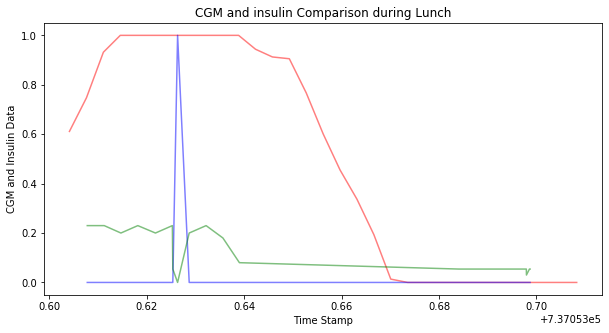

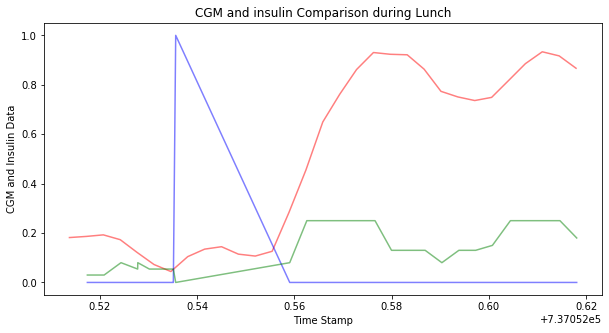

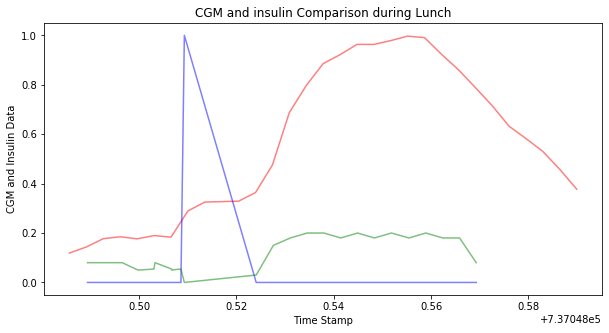

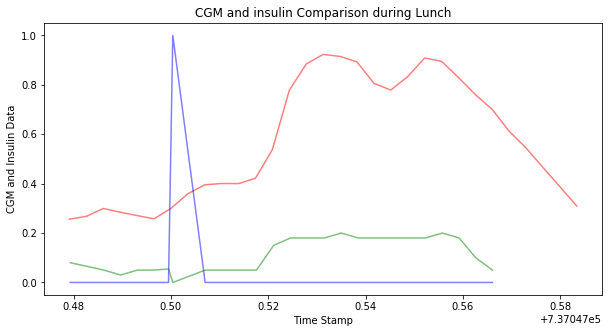

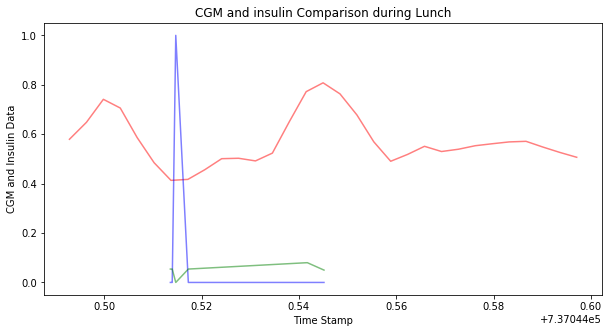

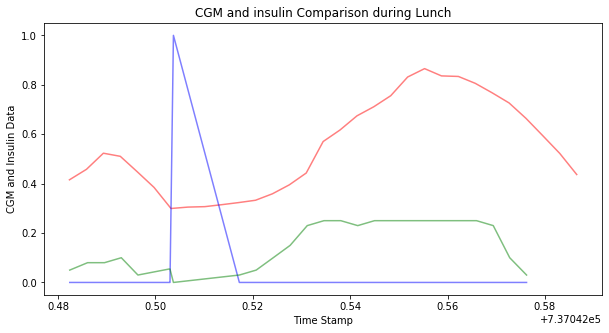

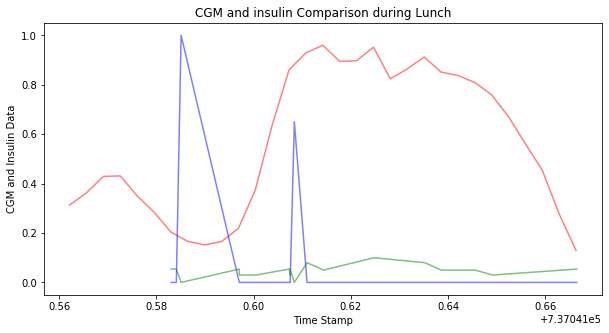

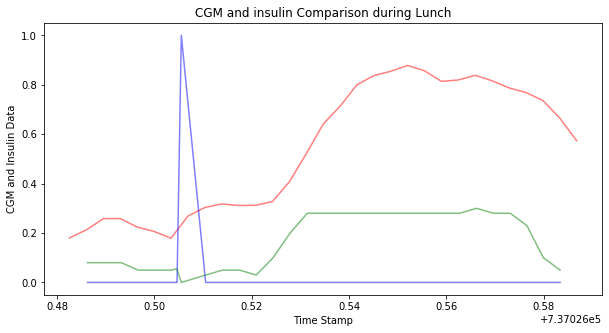

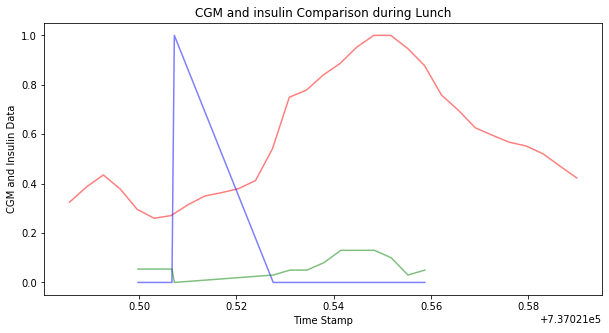

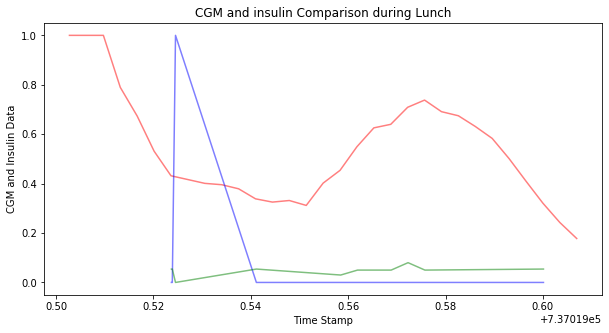

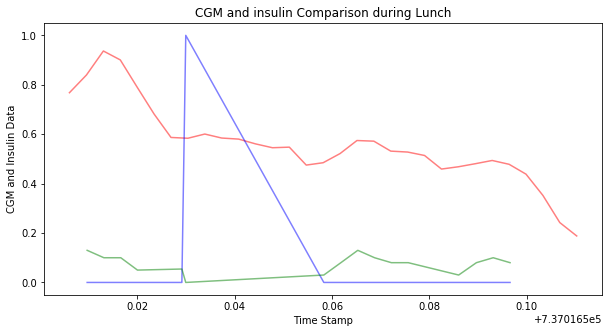

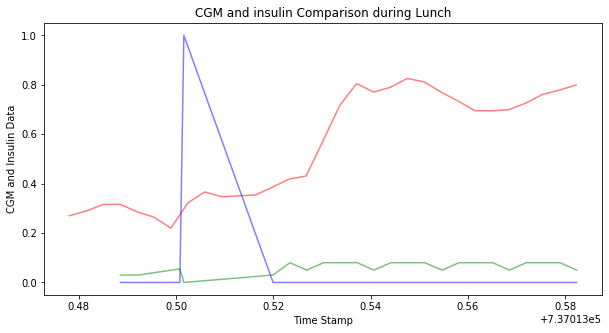

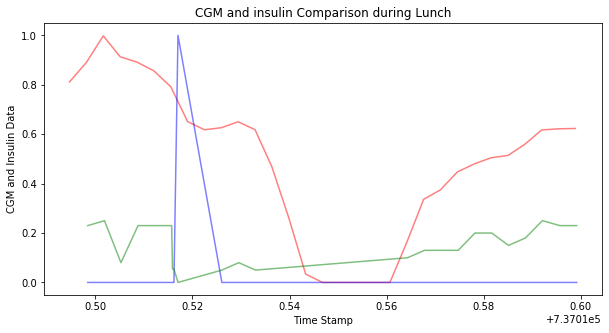

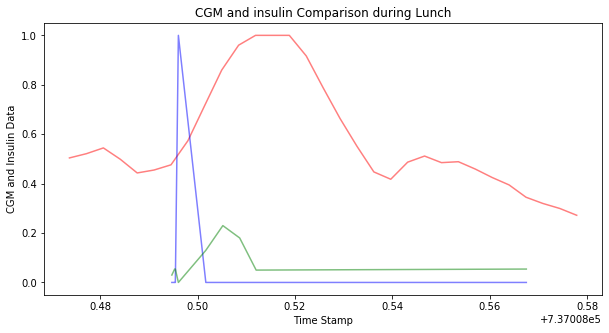

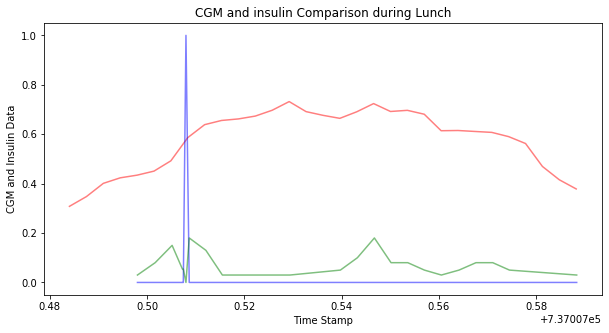

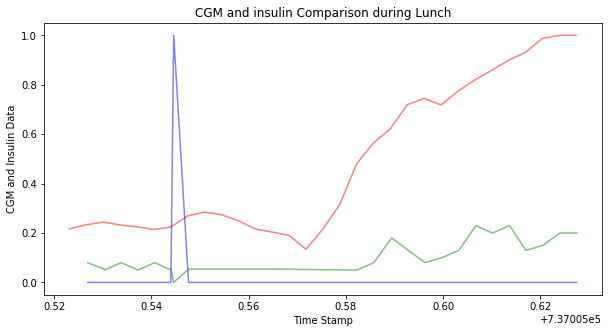

In [6]:
#Graph Plot for Patient 1
for i in range (0,33):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(TimeSeries_byRow[i],CGMData_byRow[i], c='r', alpha=0.5)
    plt.plot(InsulinTime_byRow[i], Bolus_byRow[i], c='b', alpha=0.5)
    plt.plot(InsulinTime_byRow[i], Basal_byRow[i], c='g', alpha=0.5)
    plt.show()

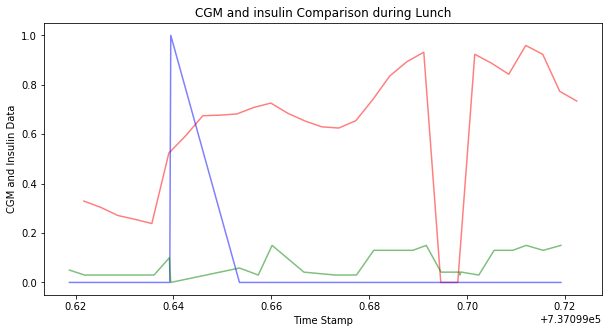

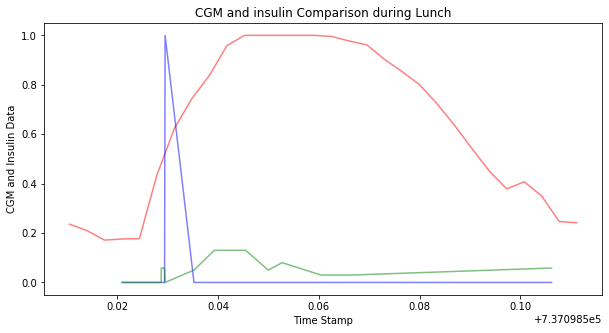

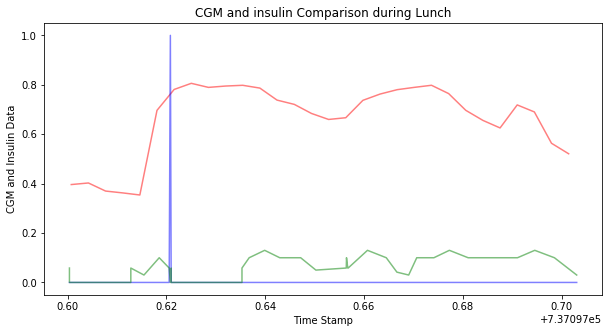

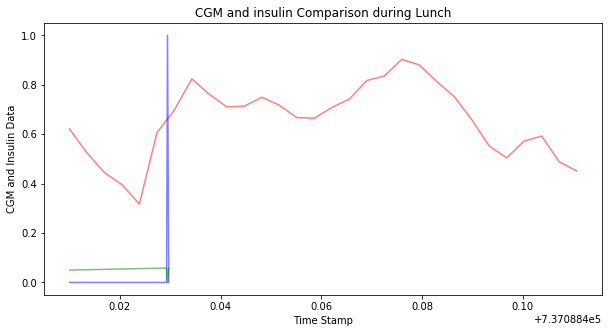

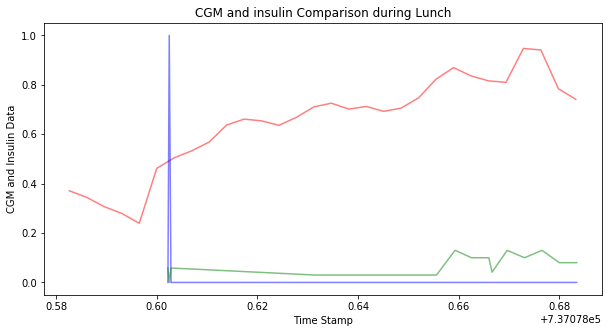

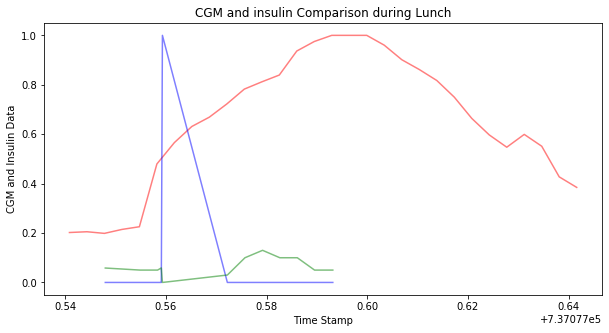

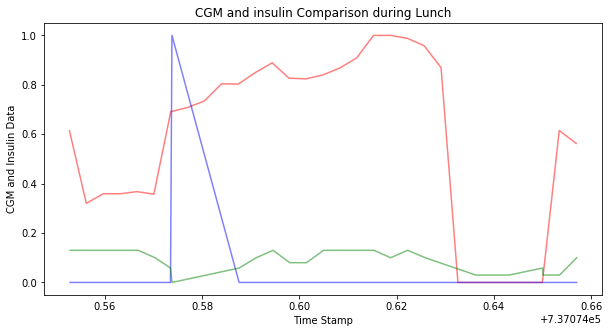

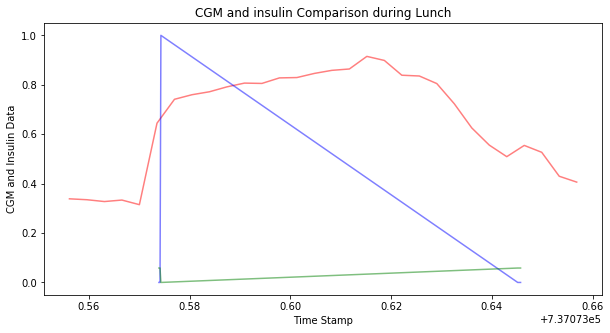

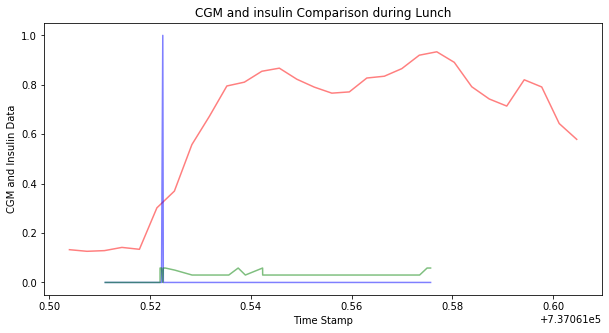

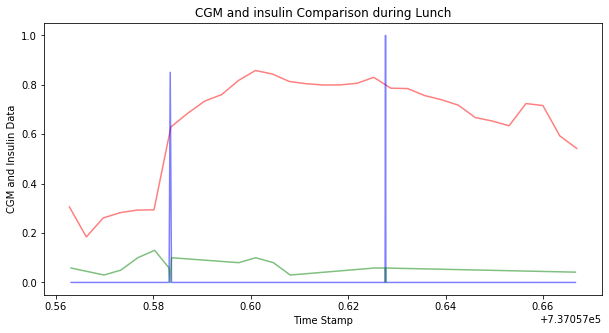

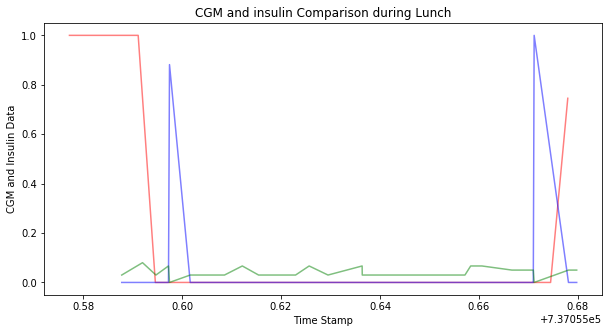

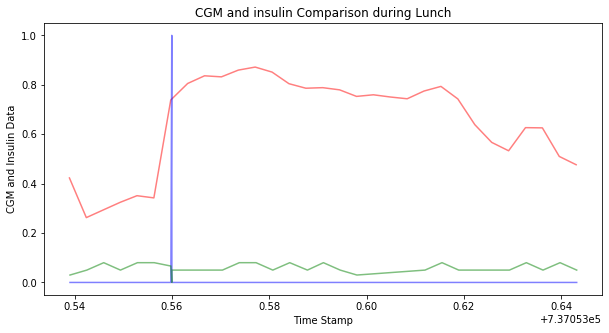

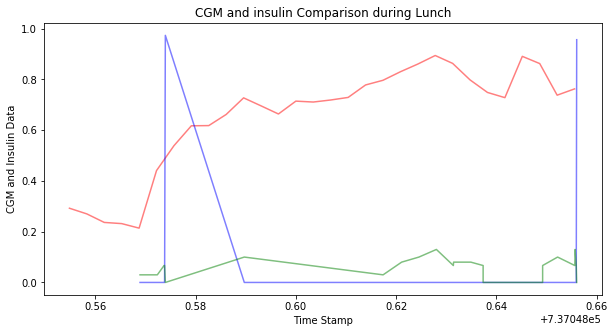

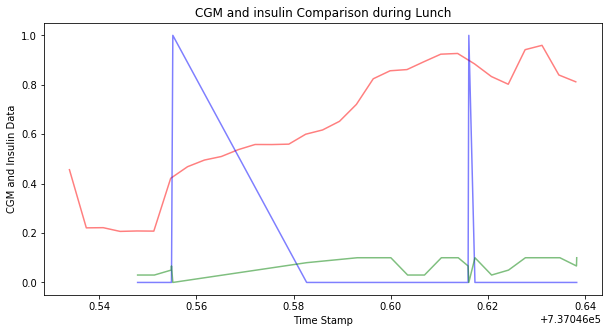

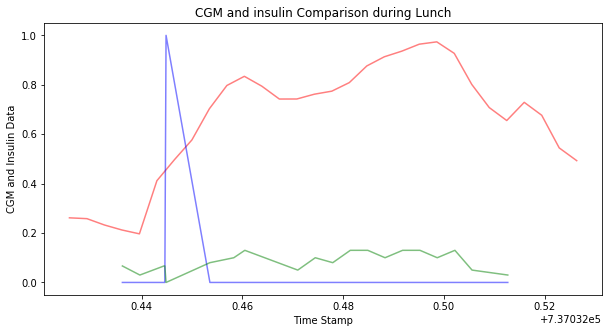

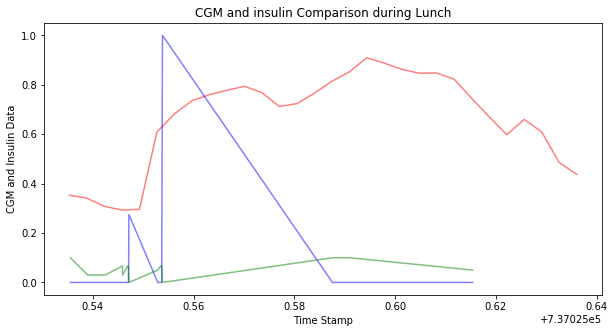

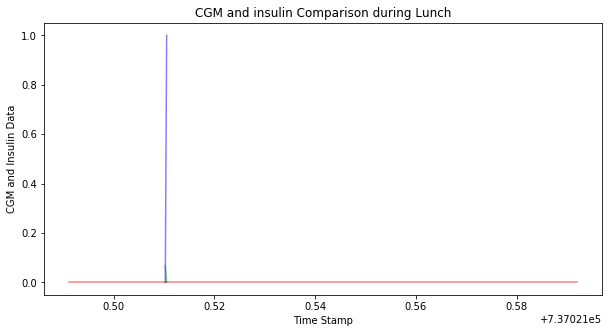

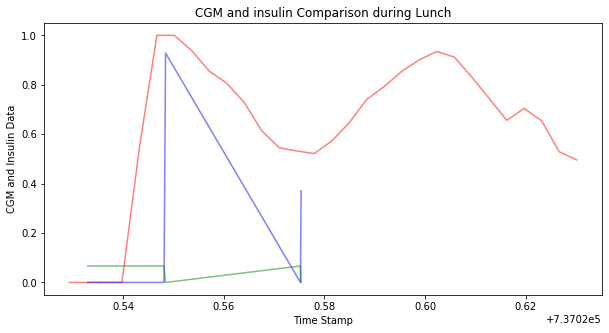

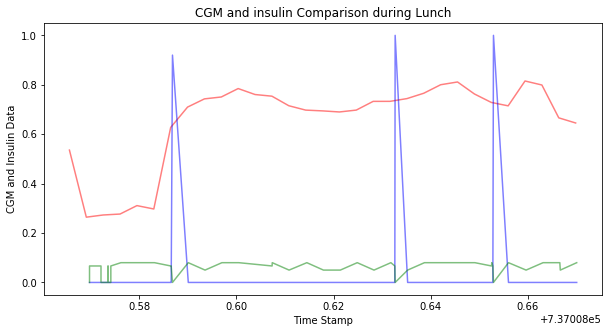

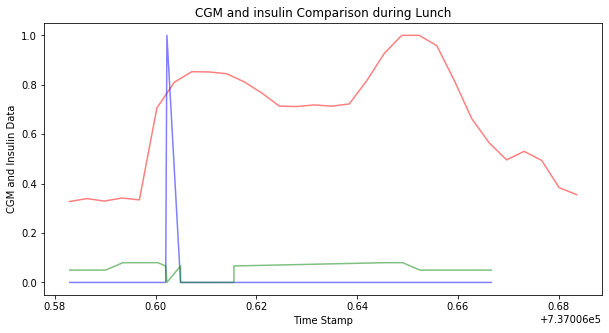

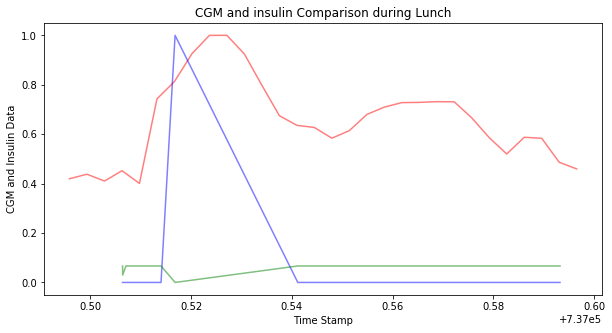

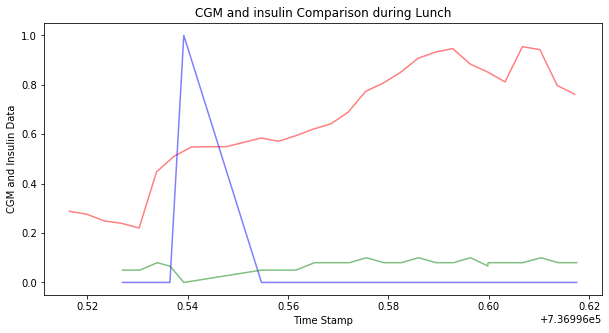

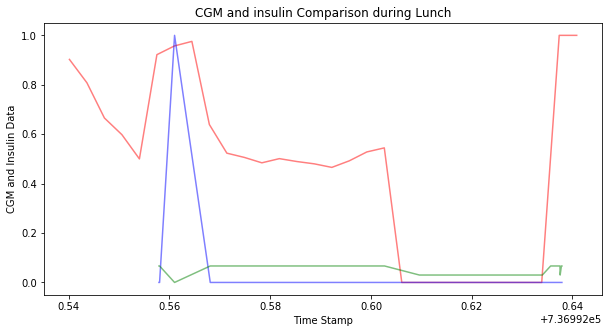

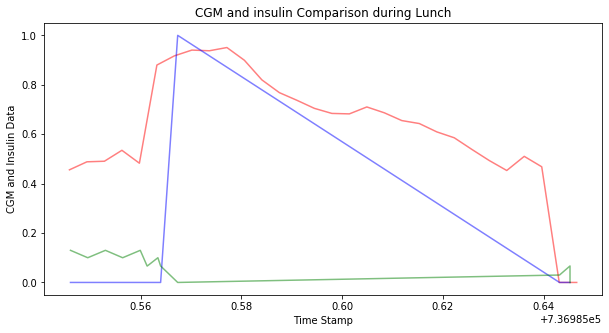

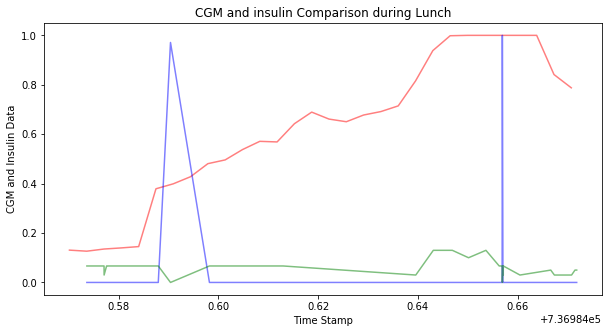

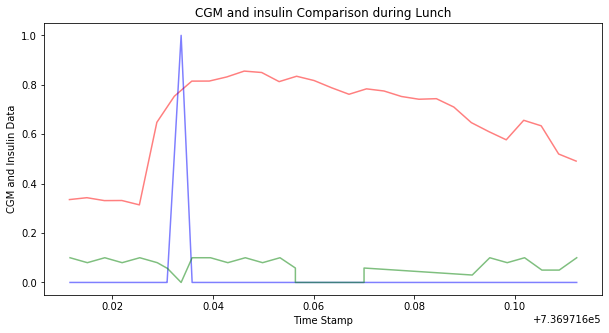

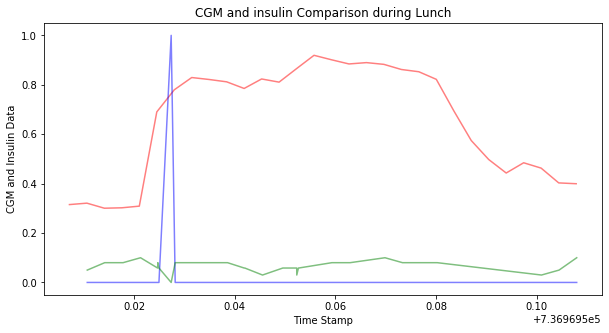

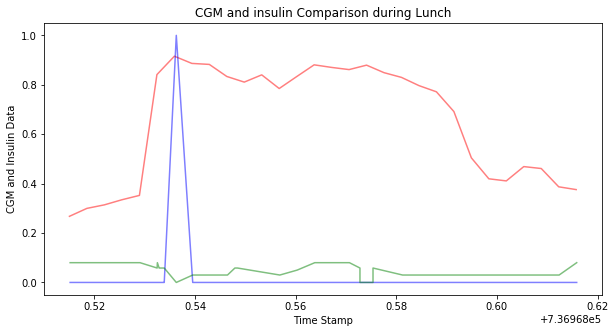

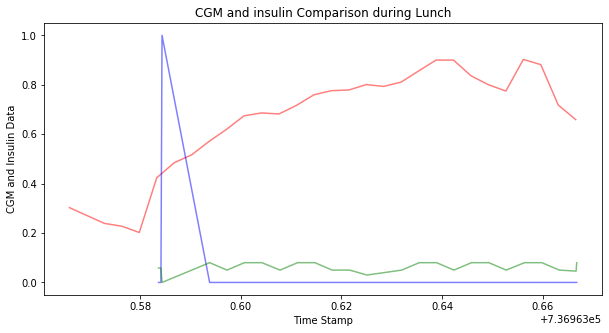

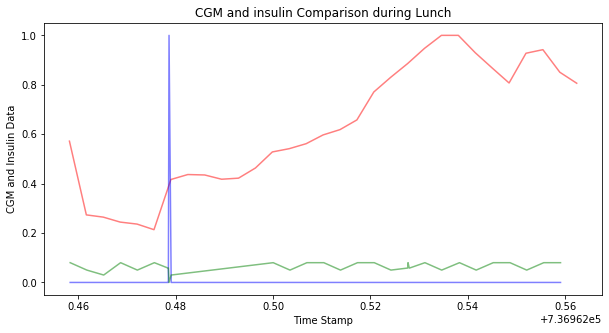

In [7]:
#Graph Plot for Patient 2
for i in range (0,30):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(TimeSeries_byRow_2[i],CGMData_byRow_2[i], c='r', alpha=0.5)
    plt.plot(InsulinTime_byRow_2[i], Bolus_byRow_2[i], c='b', alpha=0.5)
    plt.plot(InsulinTime_byRow_2[i], Basal_byRow_2[i], c='g', alpha=0.5)
    plt.show()

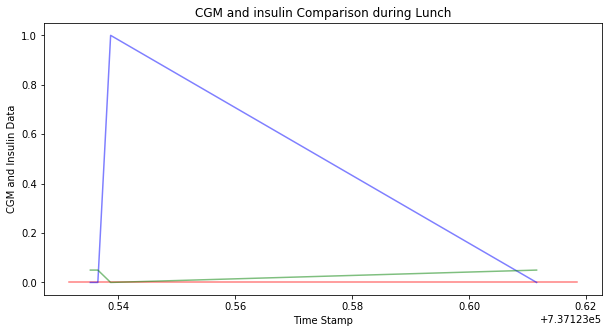

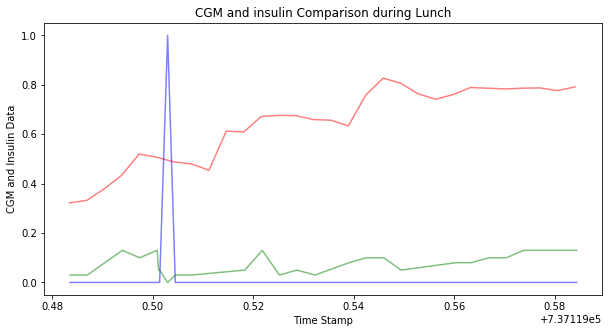

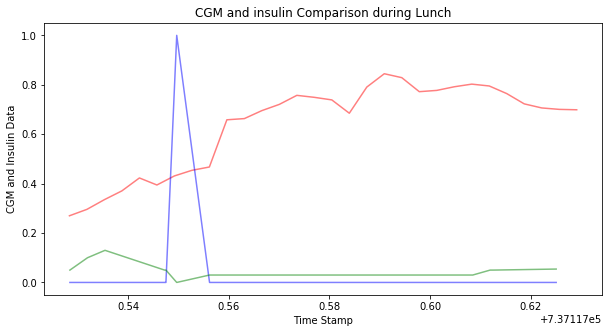

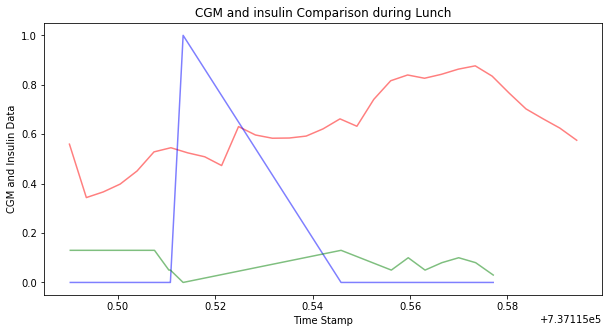

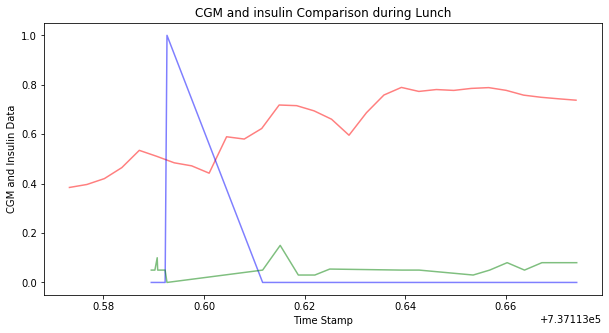

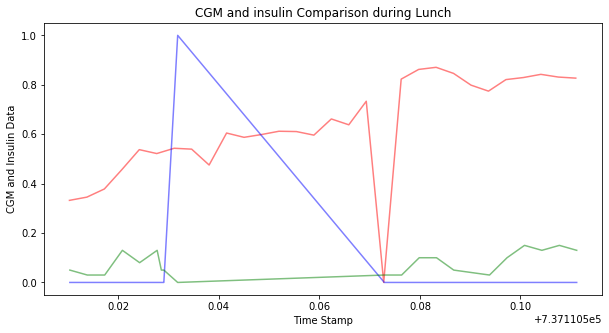

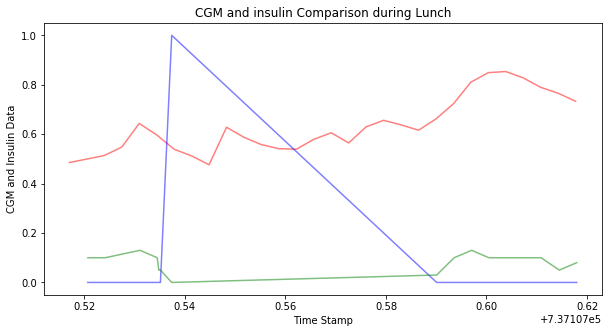

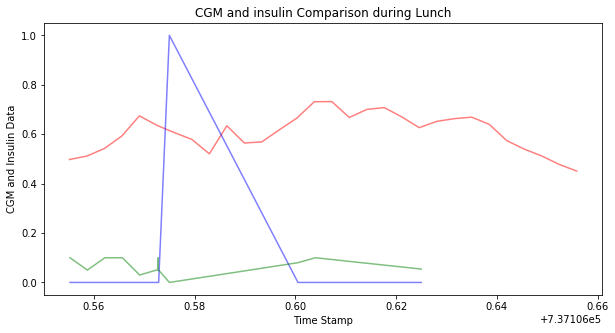

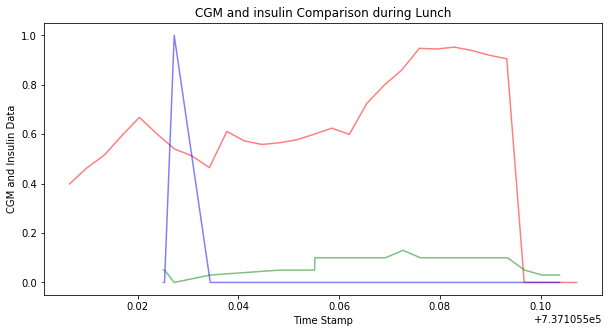

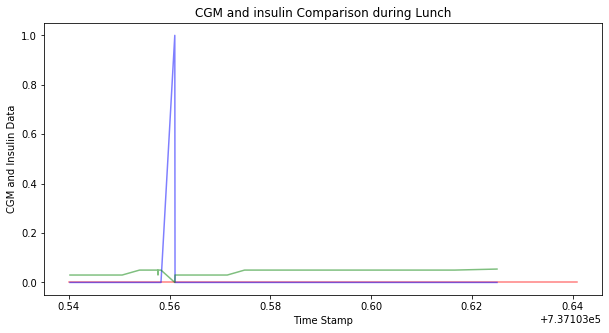

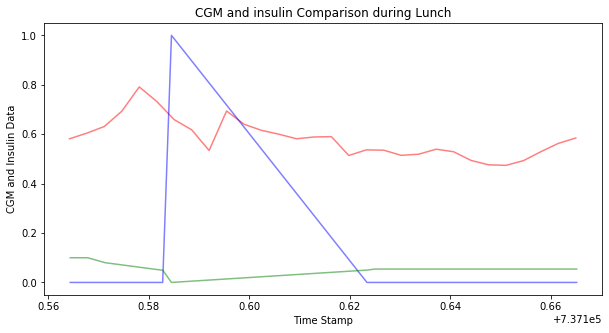

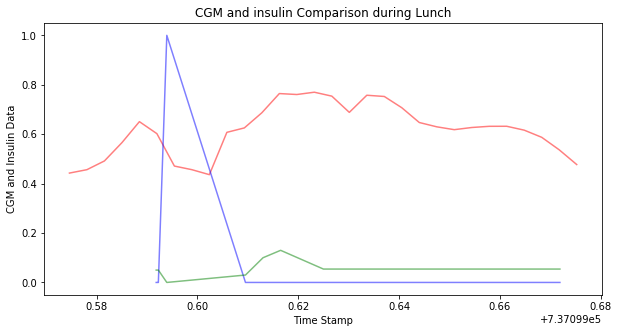

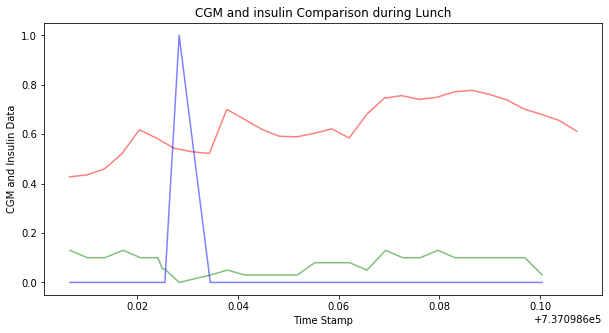

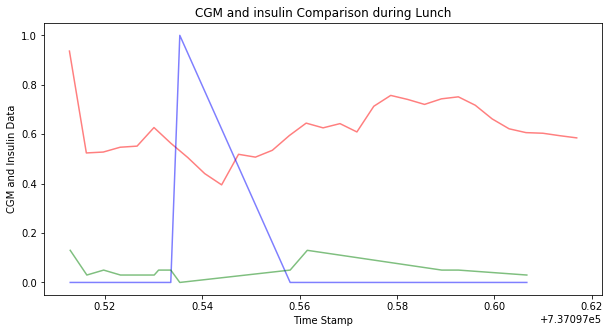

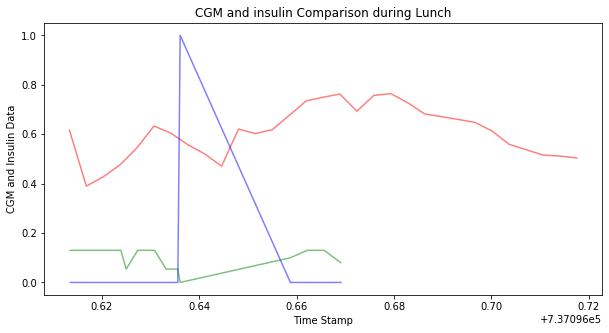

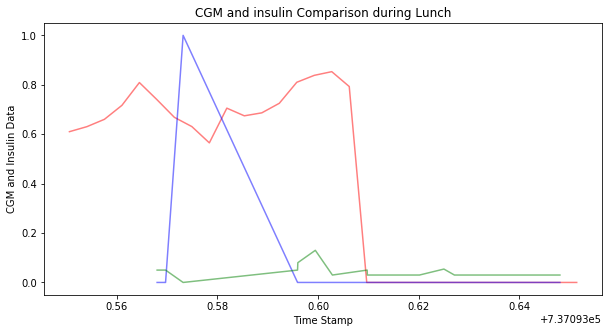

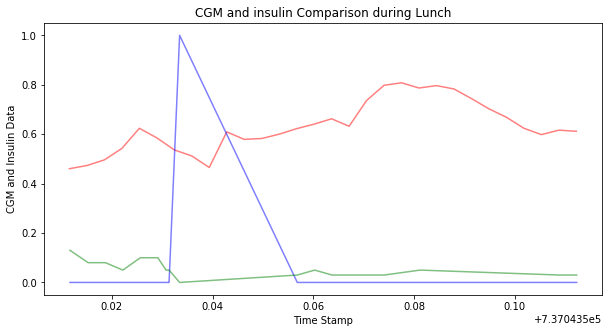

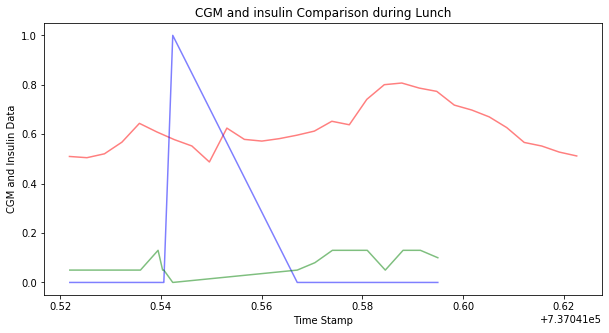

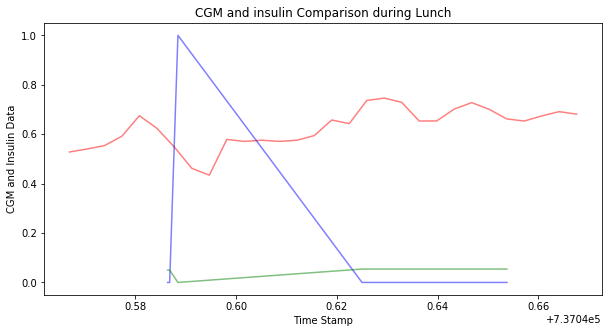

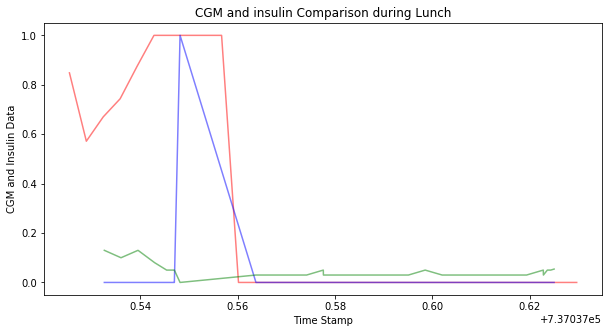

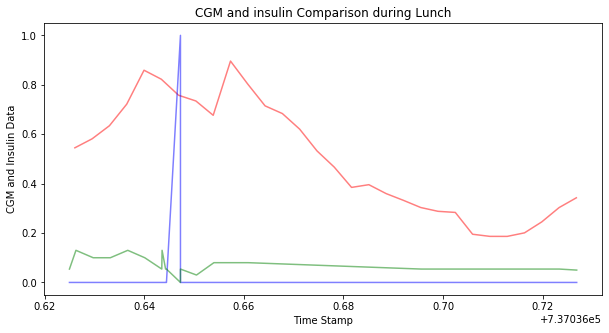

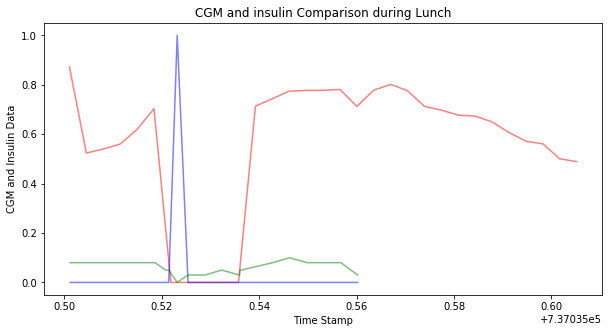

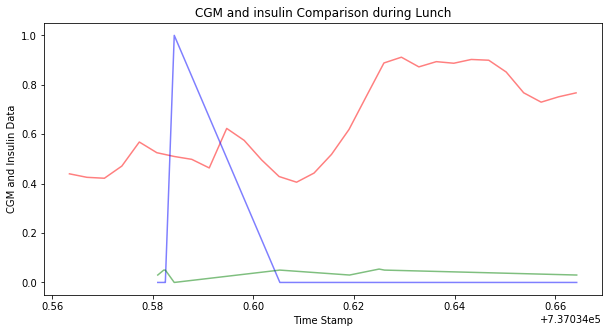

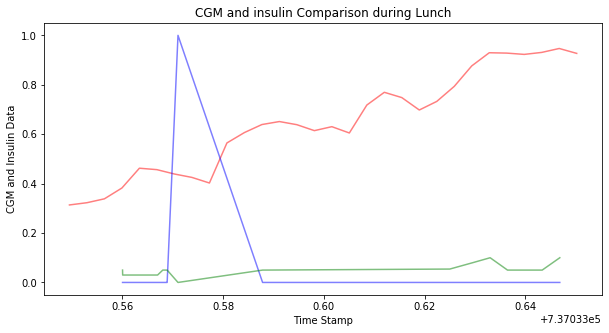

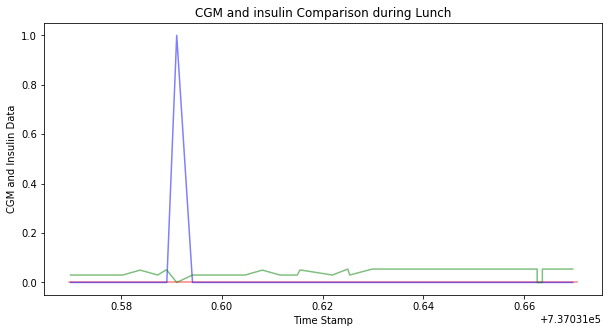

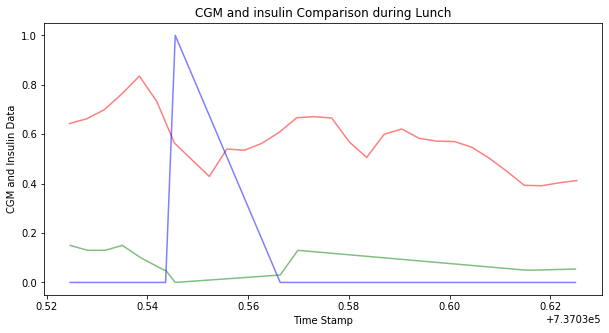

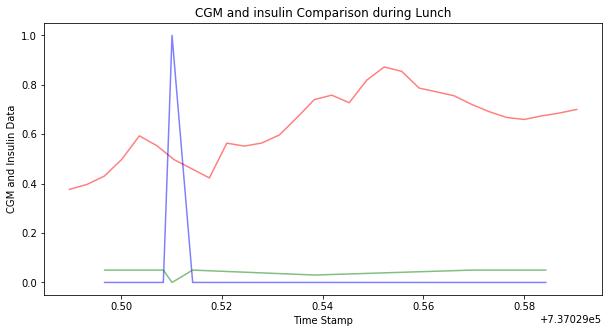

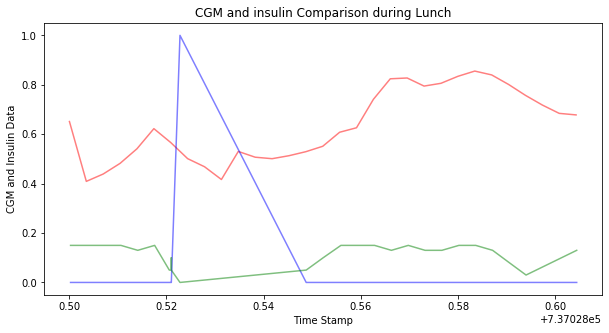

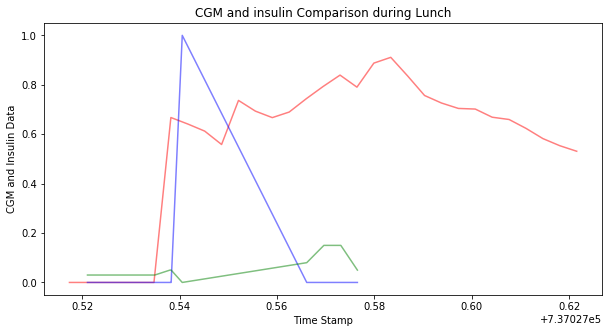

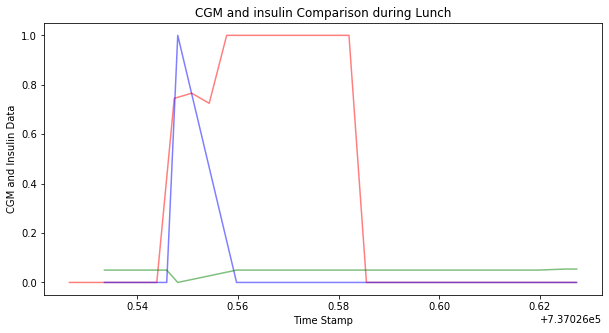

In [8]:
#Graph Plot for Patient 3
for i in range (0,30):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(TimeSeries_byRow_3[i],CGMData_byRow_3[i], c='r', alpha=0.5)
    plt.plot(InsulinTime_byRow_3[i], Bolus_byRow_3[i], c='b', alpha=0.5)
    plt.plot(InsulinTime_byRow_3[i], Basal_byRow_3[i], c='g', alpha=0.5)
    plt.show()

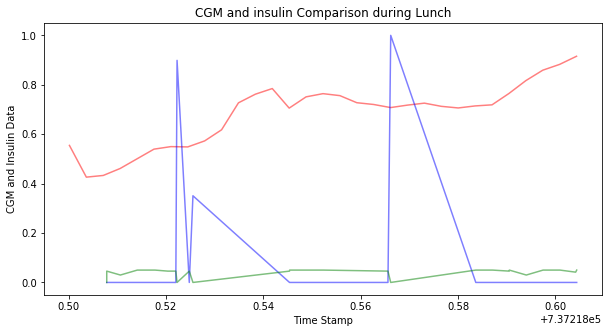

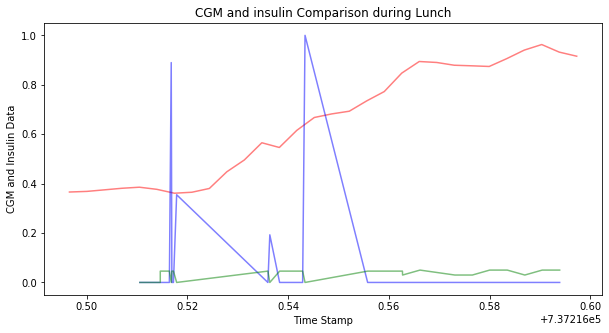

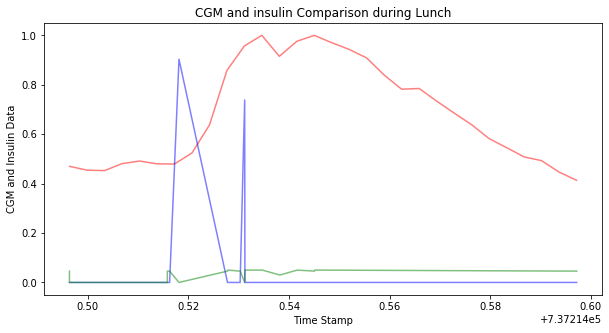

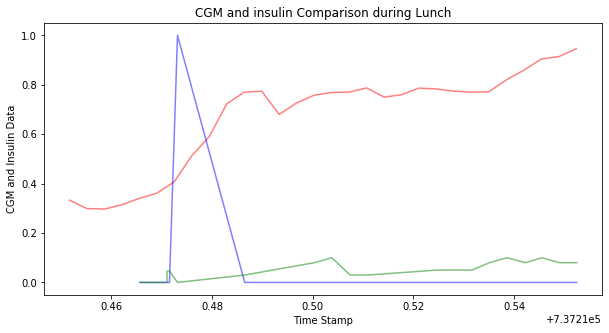

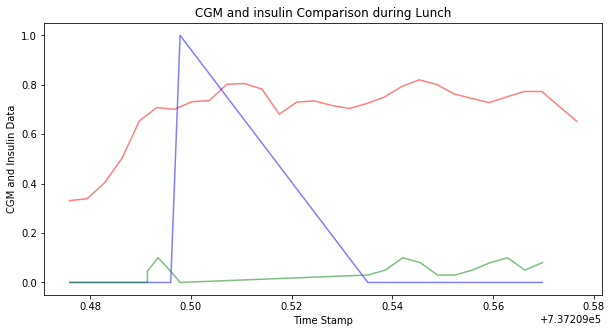

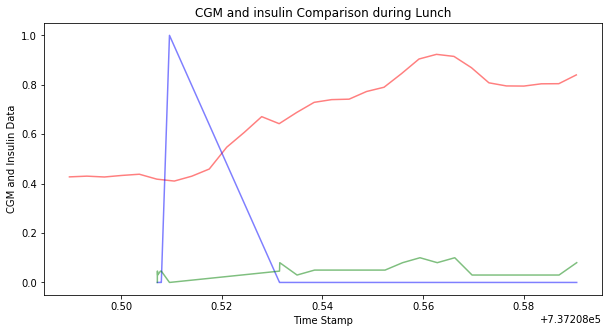

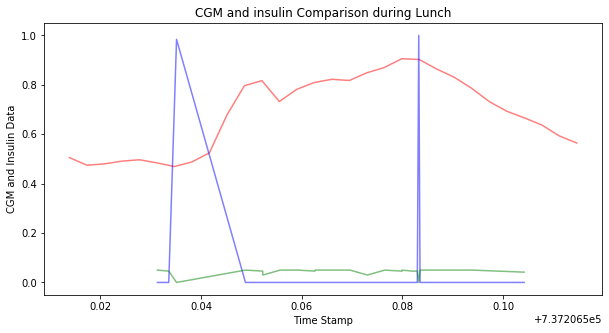

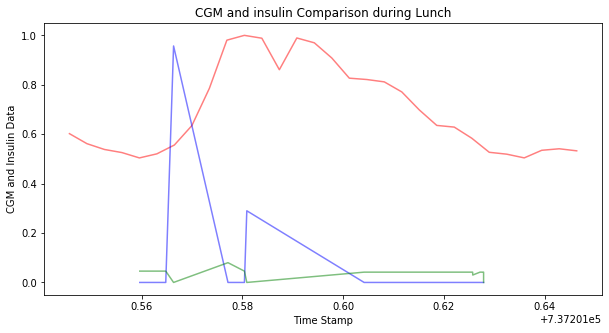

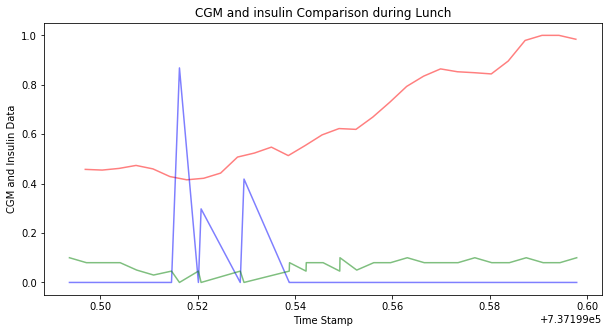

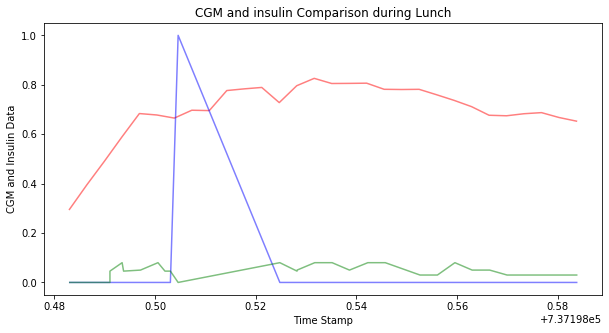

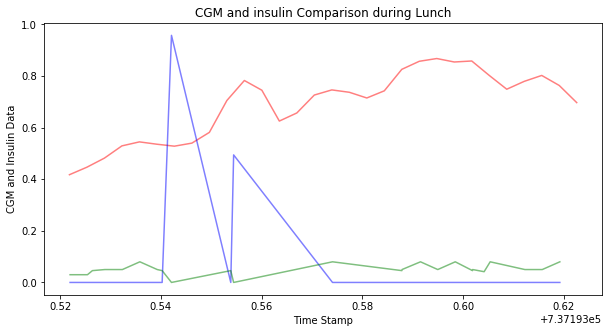

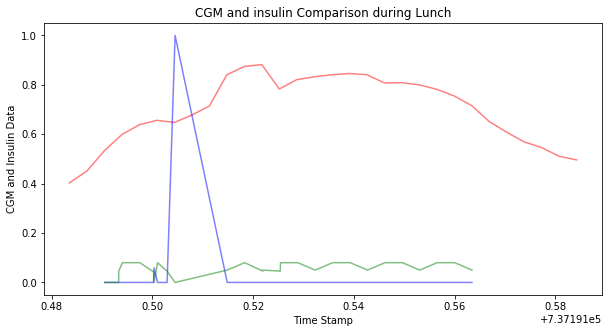

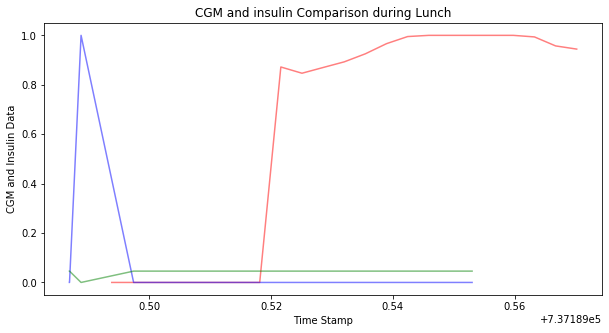

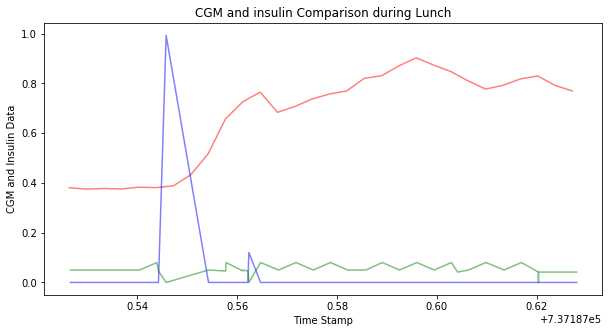

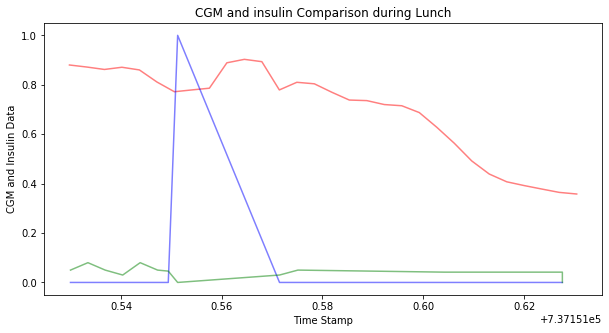

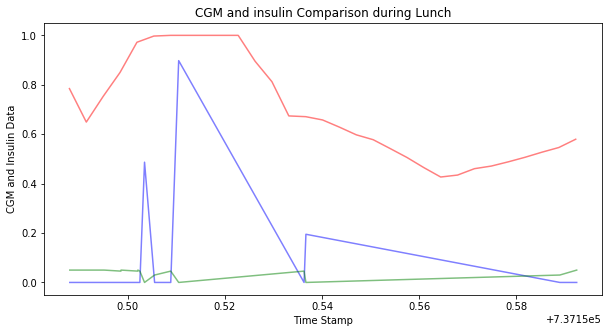

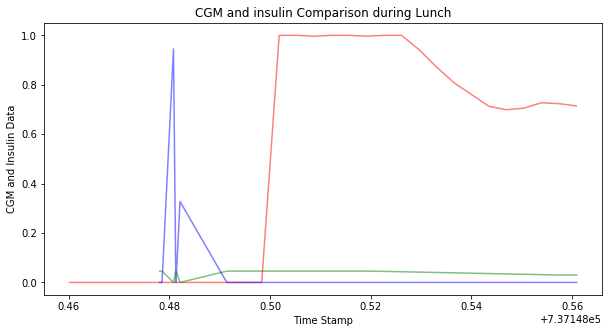

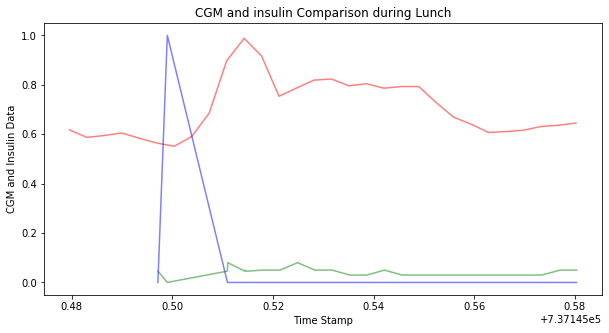

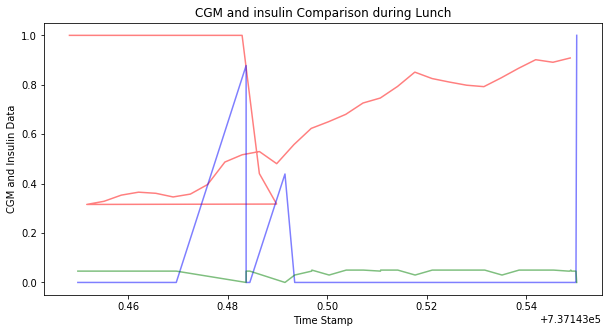

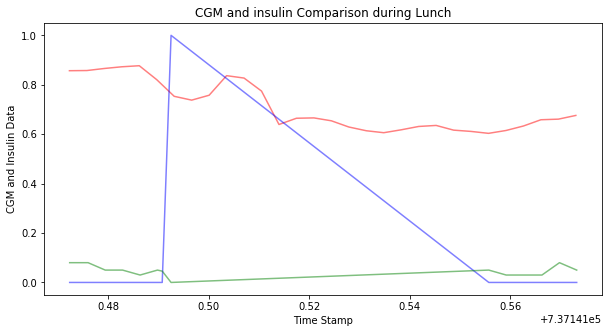

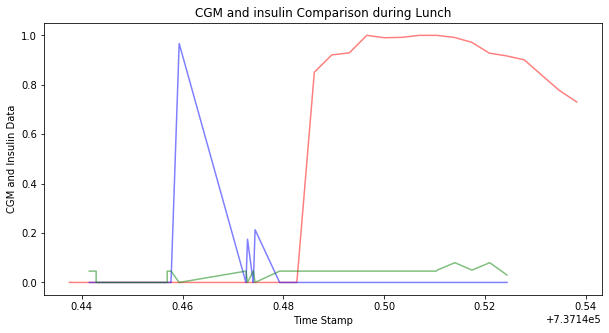

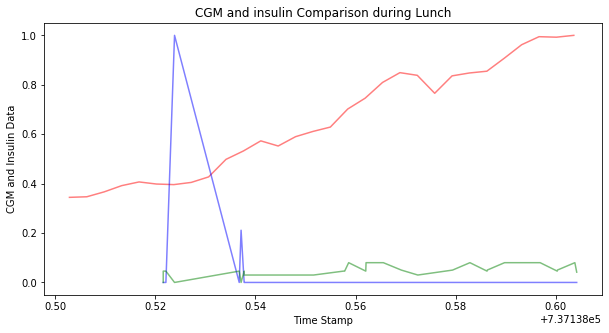

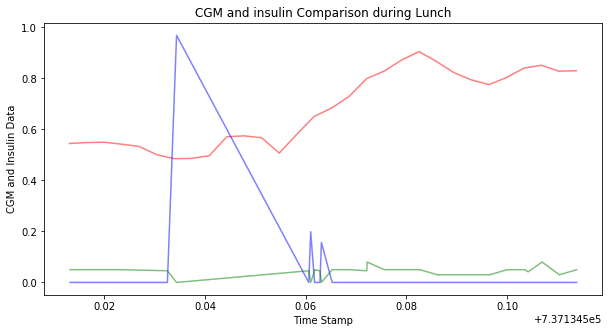

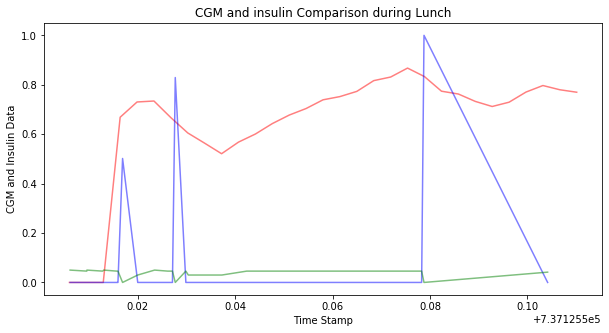

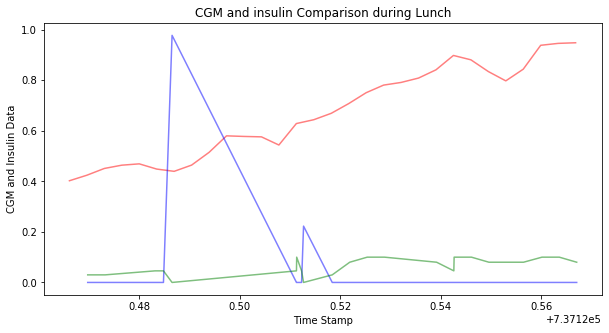

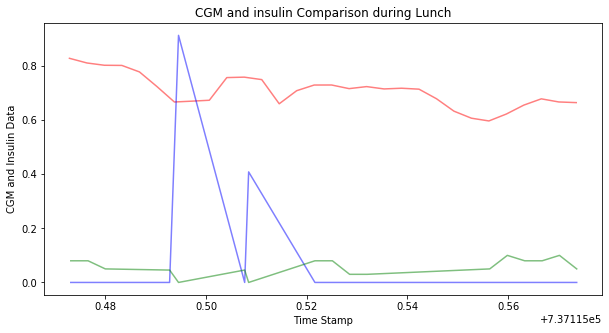

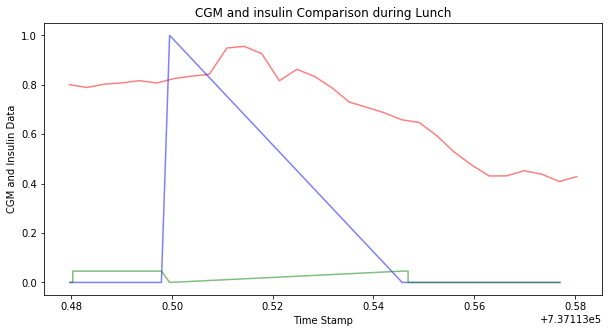

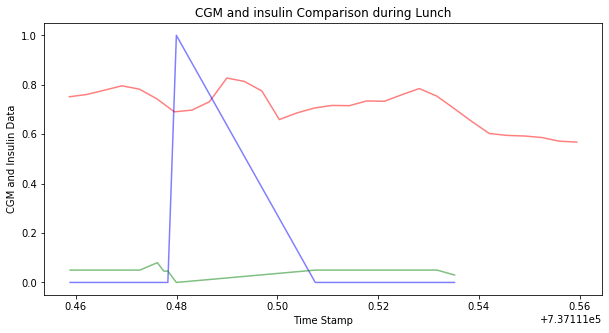

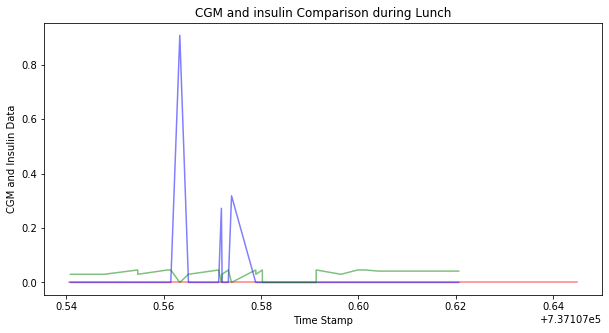

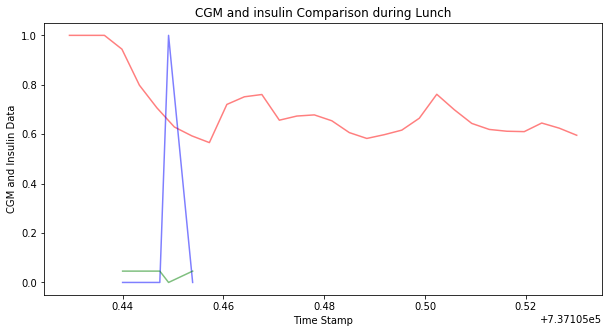

In [9]:
#Graph Plot for Patient 4
for i in range (0,30):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(TimeSeries_byRow_4[i],CGMData_byRow_4[i], c='r', alpha=0.5)
    plt.plot(InsulinTime_byRow_4[i], Bolus_byRow_4[i], c='b', alpha=0.5)
    plt.plot(InsulinTime_byRow_4[i], Basal_byRow_4[i], c='g', alpha=0.5)
    plt.show()

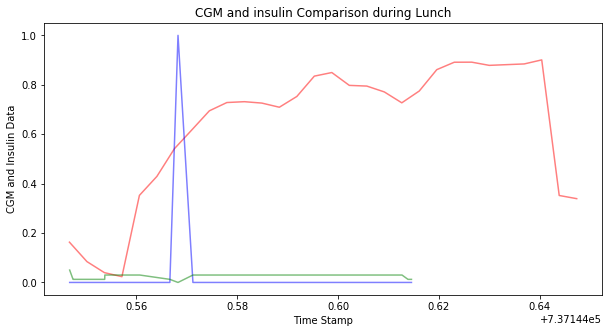

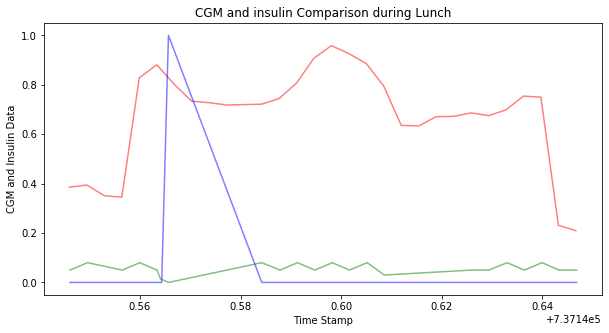

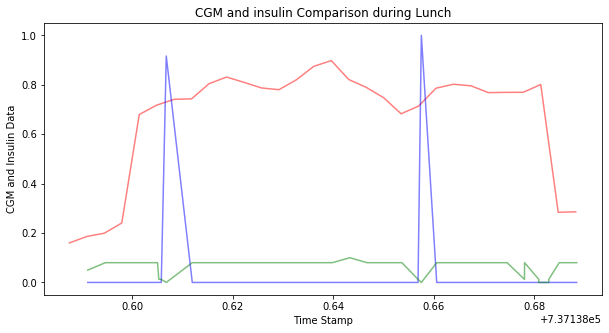

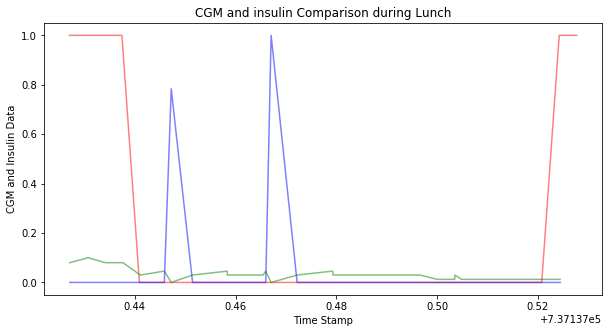

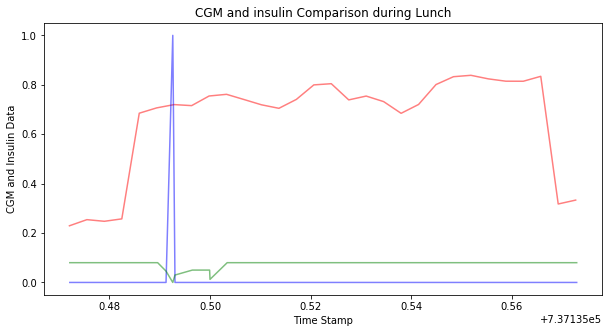

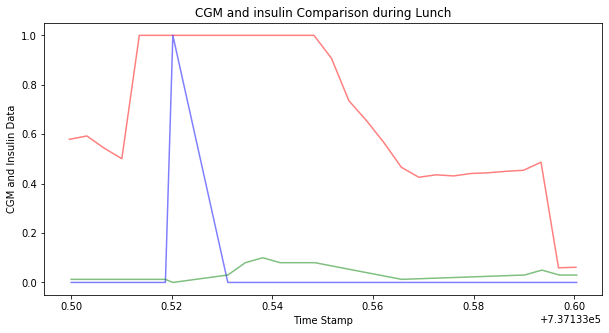

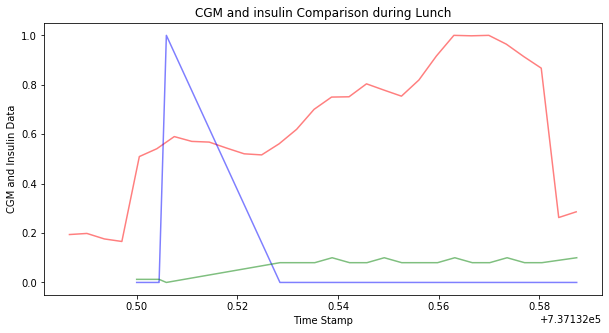

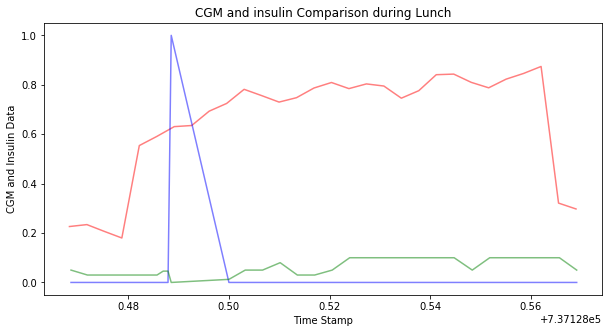

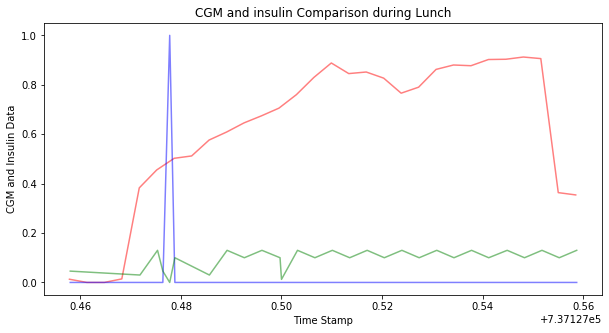

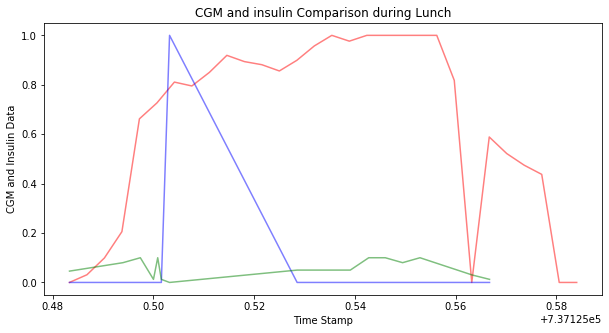

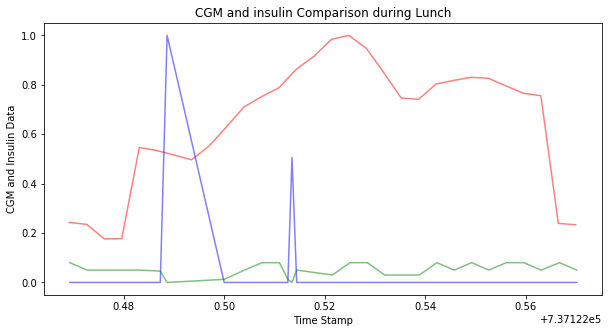

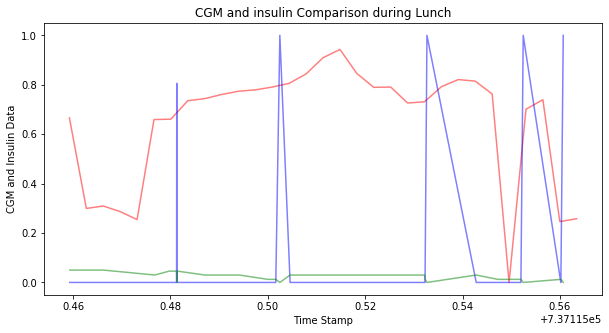

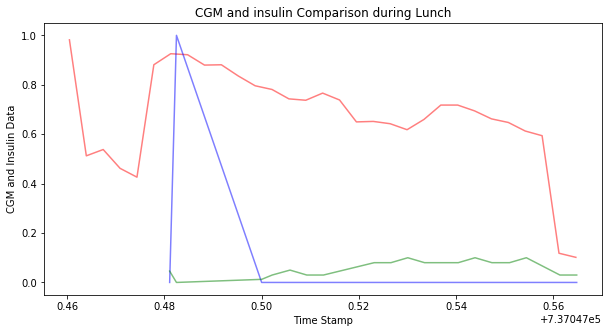

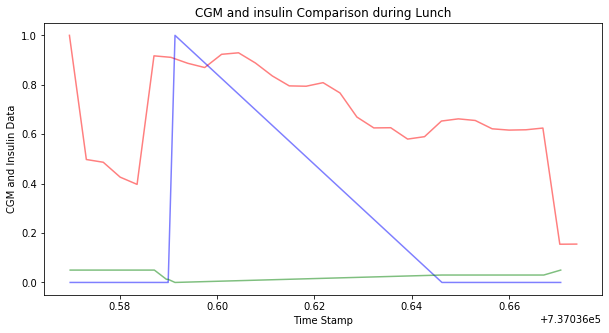

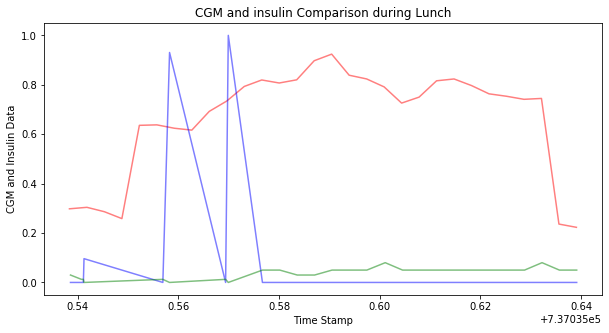

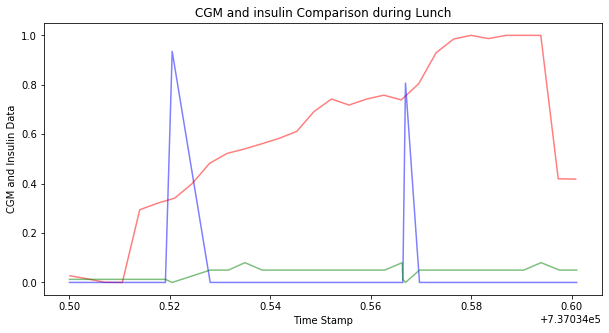

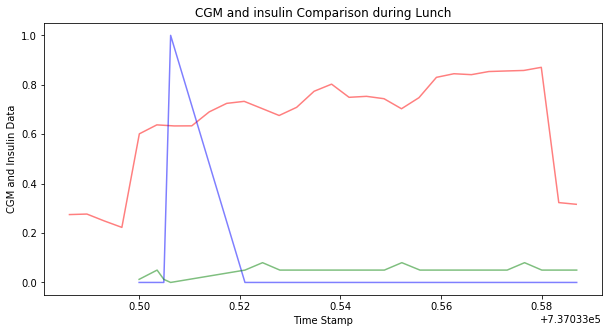

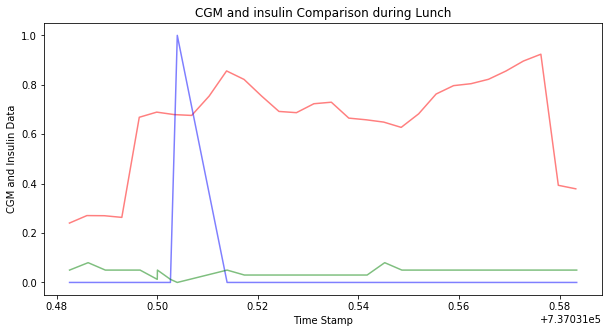

In [10]:
#Graph Plot for Patient 5
for i in range (0,18):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(TimeSeries_byRow_5[i],CGMData_byRow_5[i], c='r', alpha=0.5)
    plt.plot(InsulinTime_byRow_5[i], Bolus_byRow_5[i], c='b', alpha=0.5)
    plt.plot(InsulinTime_byRow_5[i], Basal_byRow_5[i], c='g', alpha=0.5)
    plt.show()

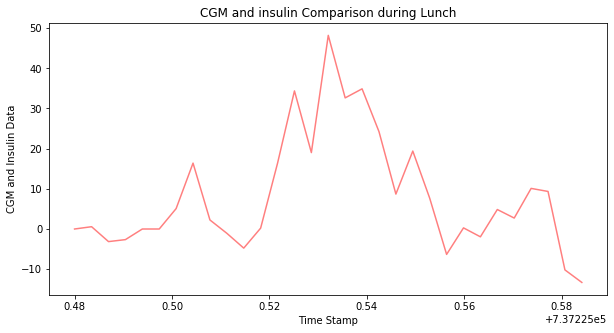

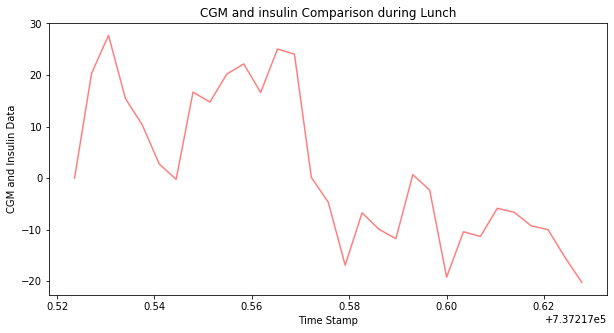

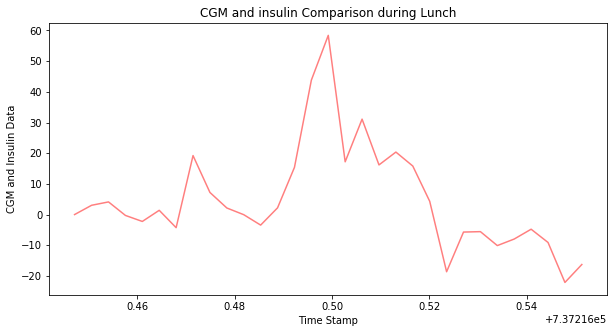

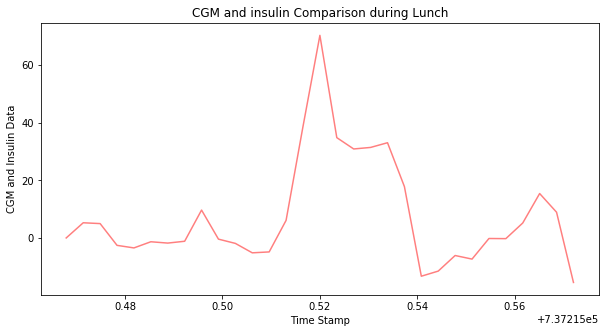

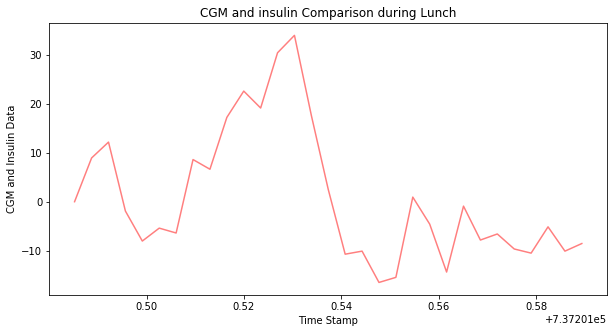

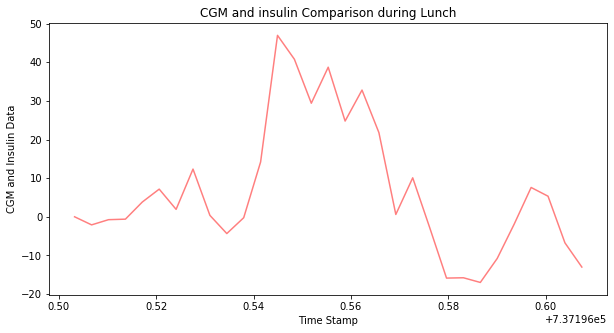

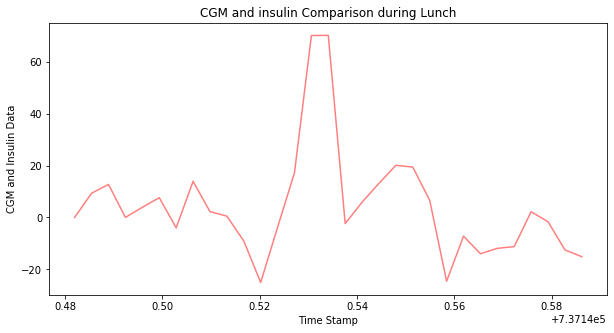

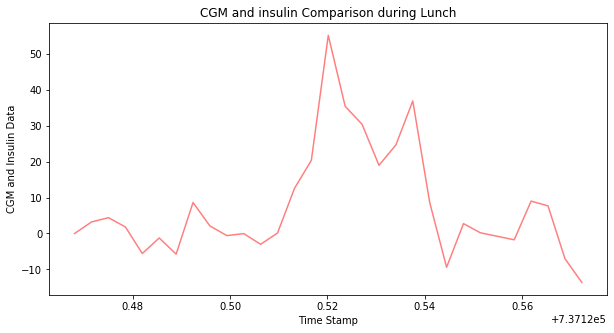

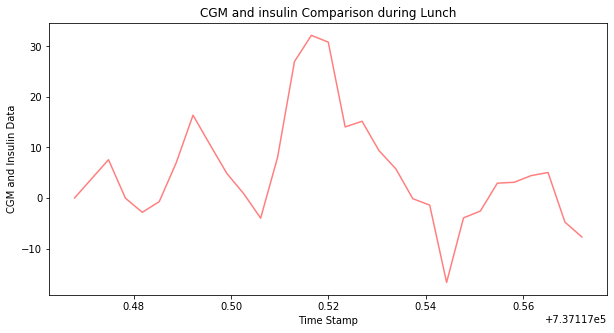

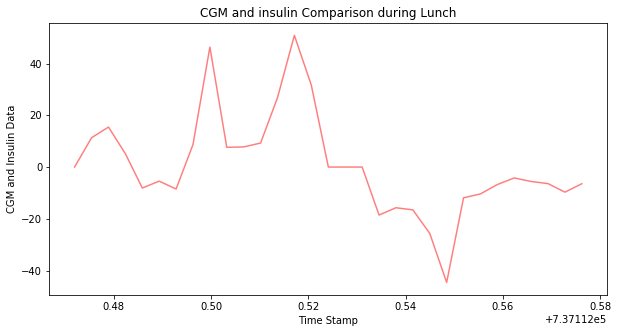

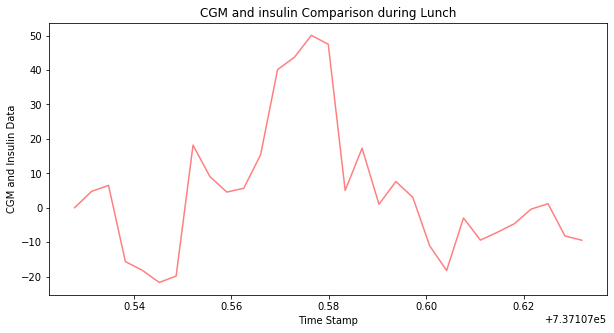

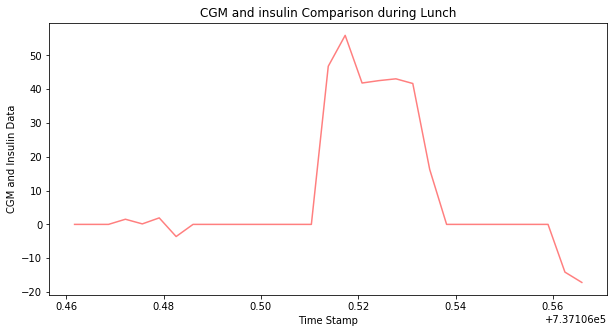

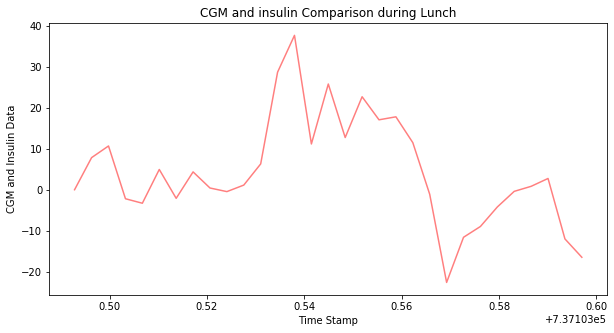

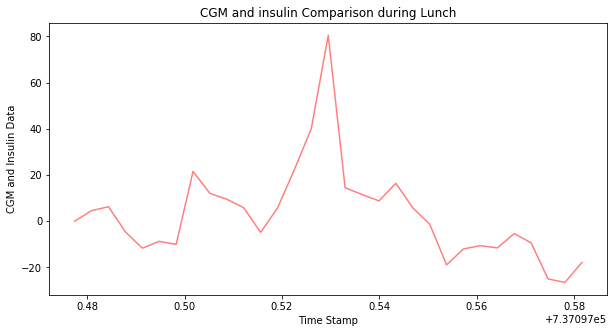

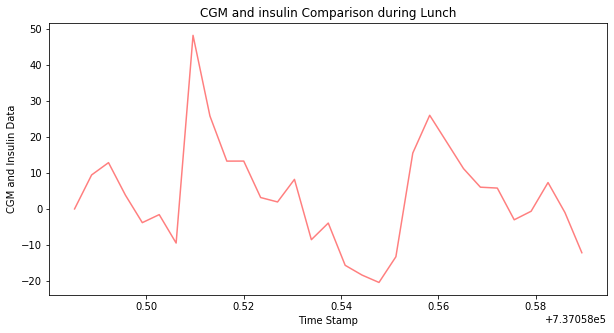

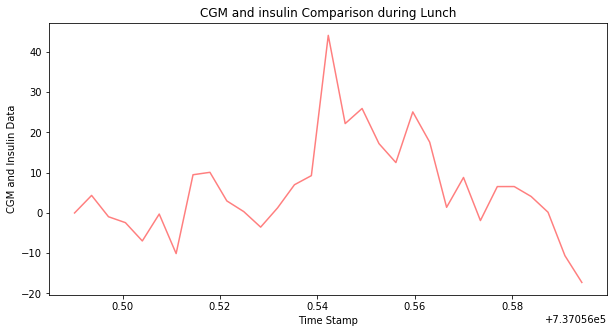

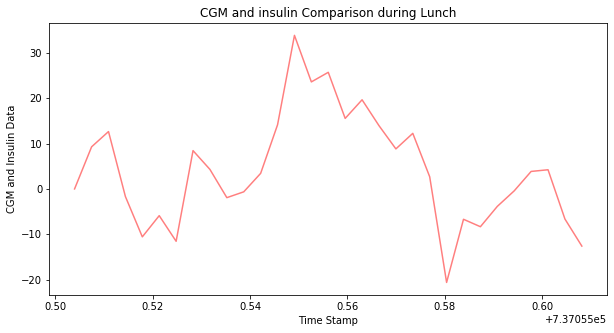

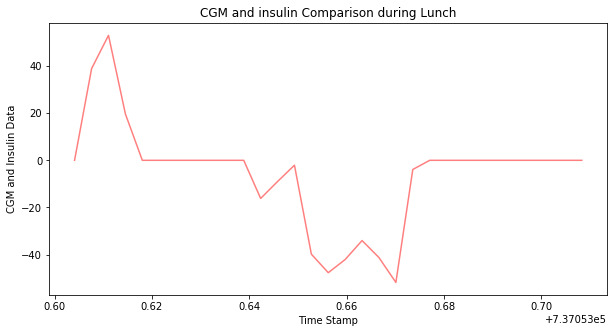

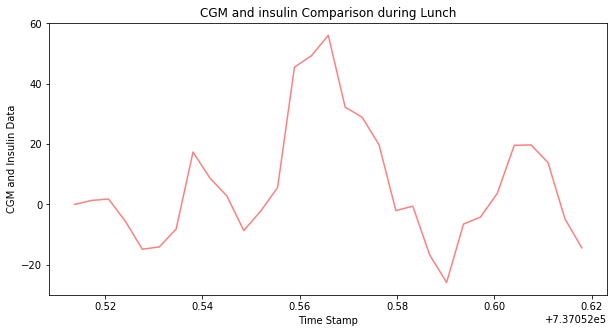

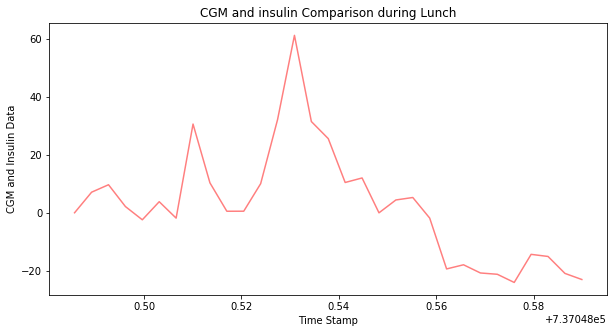

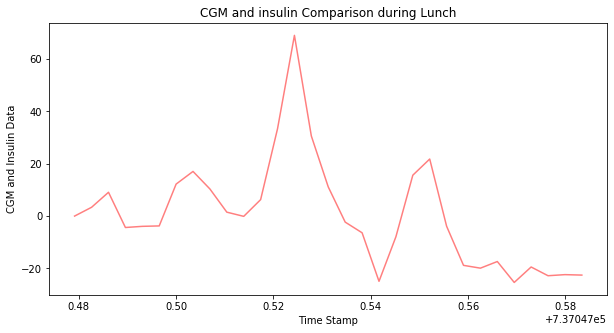

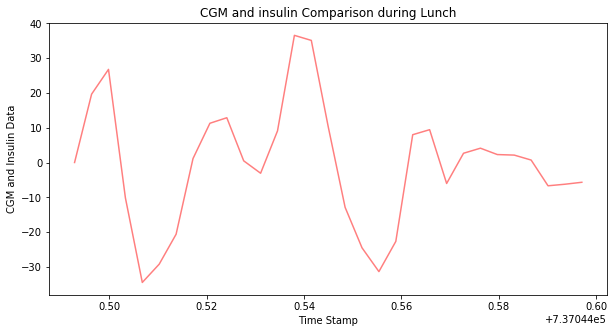

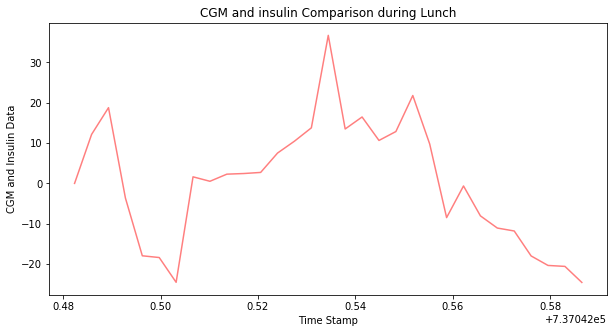

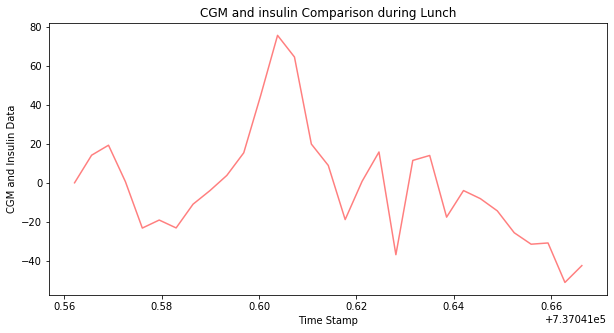

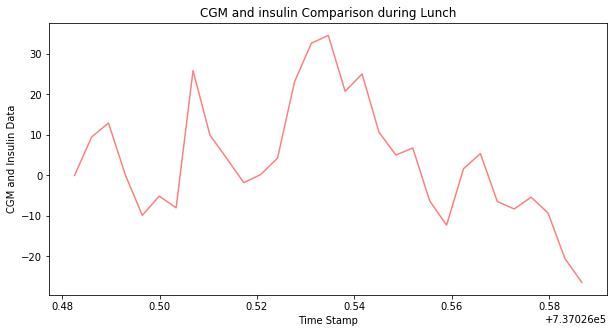

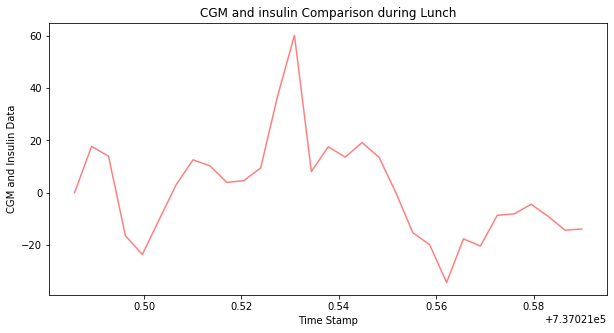

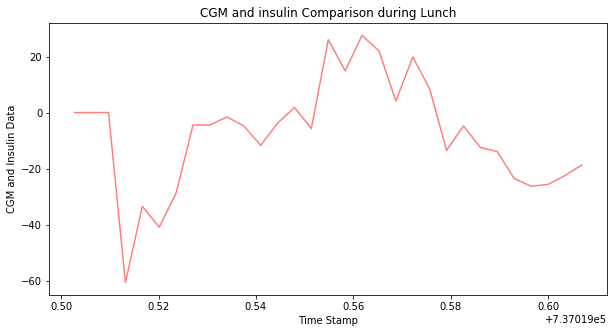

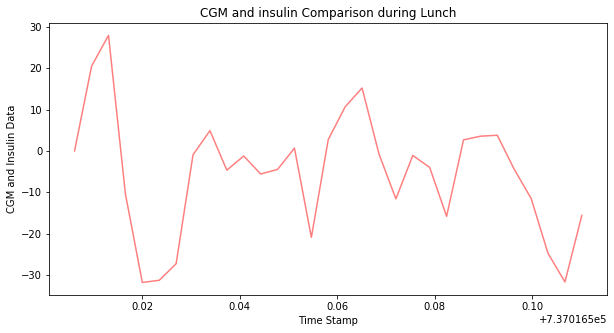

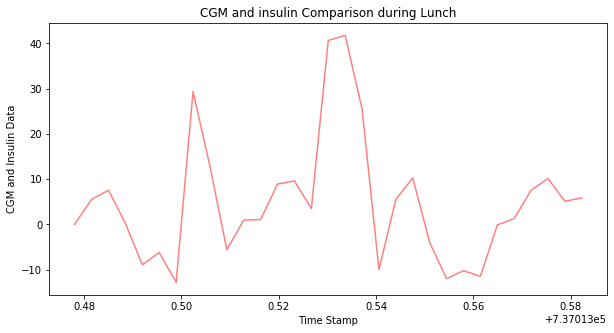

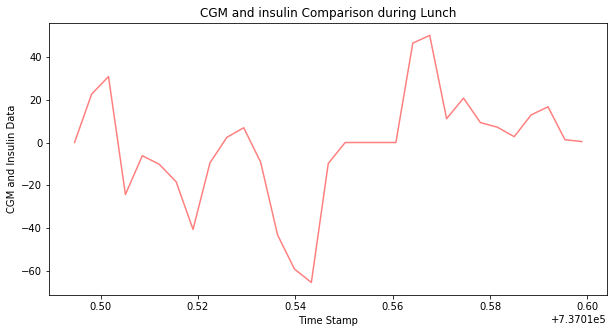

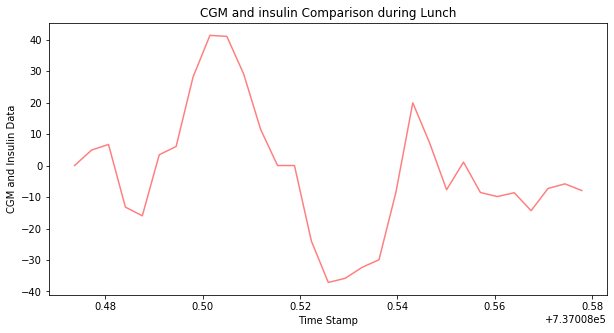

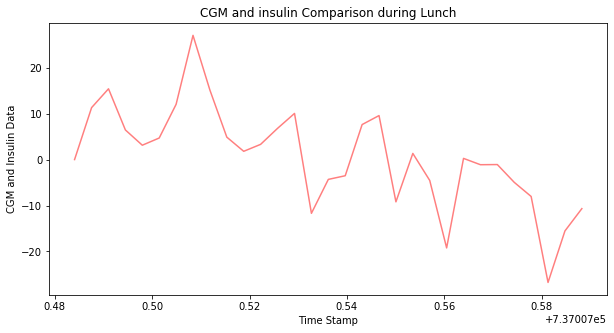

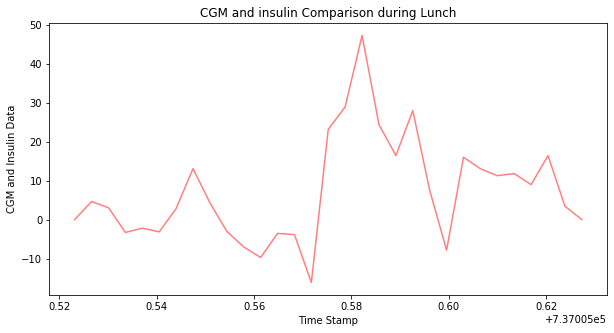

In [11]:
#Velocity w.r.t Acc Feature Calculation
avg = []
FinalMaxPoint=[]

for j in range(0,33):
    for i in range(0,30):
        avg.append((CGMData_byRow[j][i+1]-CGMData_byRow[j][i])/(TimeSeries_byRow[j][i+1]-TimeSeries_byRow[j][i]))
    avg.append(0)
    #print(avg)
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(TimeSeries_byRow[j],avg, c='r', alpha=0.5)
    plt.show()
    #As Timestamp in the file is in Decending Order, our graph Starts the differential function from the end . Hence, we reverse our List.

    avg.reverse()
    MaxPointIndex=[]
    MaxPoint=[]
    LunchPoints=[]
    finalLunchPoints=[]

    for k in range(len(avg)-1):
        if avg[k] > 0 and avg[k+1] < 0:
            MaxPointIndex.append(k)      #point where he is done eating

    for l in range(len(MaxPointIndex)):
        MaxPoint.append(CGMData_b.iloc[j][MaxPointIndex[l]]) #append corresponding CGM data.

    #print(MaxPoint)
    peak=max(MaxPoint)
    for i in range(len(MaxPoint)):
        #peak=max(MaxPoint)
        if MaxPoint[i] >= peak-25 and MaxPoint[i] <= peak:
            LunchPoints.append(MaxPoint[i])
    maxLunchPoints=max(LunchPoints)
    minLunchPoints=min(LunchPoints)
    finalLunchPoints.append(minLunchPoints)
    finalLunchPoints.append(maxLunchPoints)
    
    avg = []
    FinalMaxPoint.append(finalLunchPoints)

#print("FinalMaxPoint",FinalMaxPoint)

In [12]:
#FFT Fourrier Transform Feature Calculation

scaler_1 = MinMaxScaler(feature_range=(0,1))

CGMSeriesLunchPat1Scaled = scaler_1.fit_transform(CGMData_b)
CGMSeriesLunchPat2Scaled = scaler.fit_transform(CGMData_b_2)
CGMSeriesLunchPat3Scaled = scaler.fit_transform(CGMData_3)
CGMSeriesLunchPat4Scaled = scaler.fit_transform(CGMData_4)
CGMSeriesLunchPat5Scaled = scaler.fit_transform(CGMData_5)

temp_fft =  np.abs(np.fft.fft(np.flip(CGMSeriesLunchPat1Scaled[::-1])))

#print(type(temp_fft[:,1:9][0][0]))

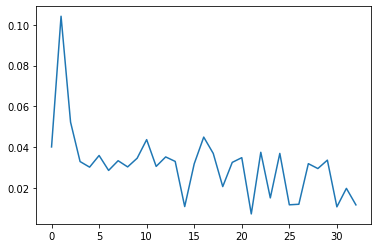

In [13]:
# Area under curve
feature_auc = simps(CGMSeriesLunchPat1Scaled[:,::-1], CGMTimeSeries[CGMTimeSeries.columns[::-1]])
#feature_auc
plt.plot()
plt.plot(feature_auc)
plt.show()

In [14]:
#lognormal distribution feature calculation

warnings.filterwarnings("ignore")

# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more
feature_lognorm_distributed_values = []

for i in range(len(CGMSeriesLunchPat1Scaled)):
    y_std = CGMData_b.iloc[i]
    
    # Set up 50 bins for chi-square test
    # Observed data will be approximately evenly distrubuted aross all bins
    percentile_bins = np.linspace(0,100,51)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Use lognorm distribution
    distribution = 'lognorm'
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)

    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p_value = np.around(p, 5)    

    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * len(y_std)
    cum_expected_frequency = np.cumsum(expected_frequency)
    cum_observed_frequency = [0.01 if x==0 else x for x in cum_observed_frequency ]
    chi_square = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    
    feature_lognorm_distributed_values.append(chi_square)

#feature_lognorm_distributed_values

In [15]:
#Coefficient of variation feature calculation
feature_COV = []
for i in range(len(CGMSeriesLunchPat1Scaled)):
    feature_COV.append(np.mean(CGMSeriesLunchPat1Scaled[:,::-1]) / np.std(CGMSeriesLunchPat1Scaled[:,::-1]))

#feature_COV

In [16]:
#Discrete Wavelet Transform Feature
cA, cB = pywt.dwt(CGMSeriesLunchPat1Scaled[:][::-1], 'db1')
feature_dwt_top6 = cA[:,0:6] #sorted in Ascending
#plt.plot(cA[:-8])

#feature_dwt_top6

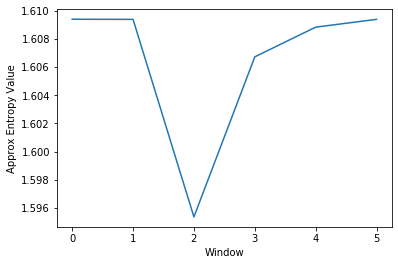

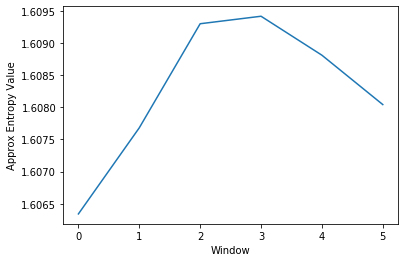

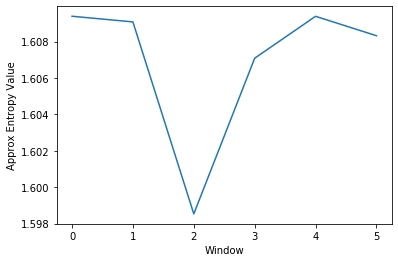

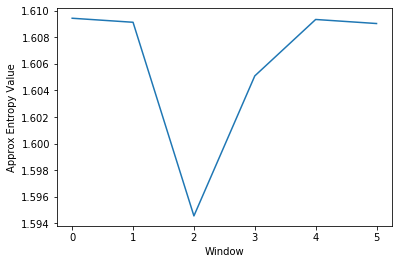

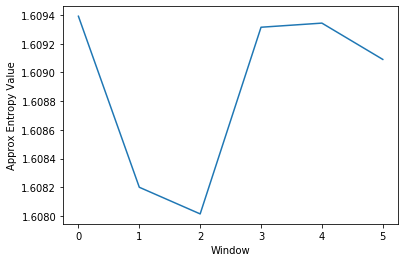

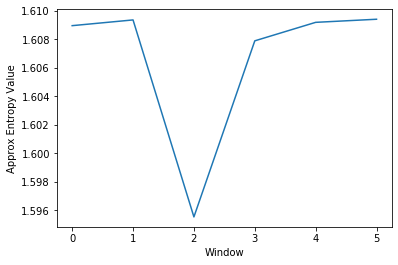

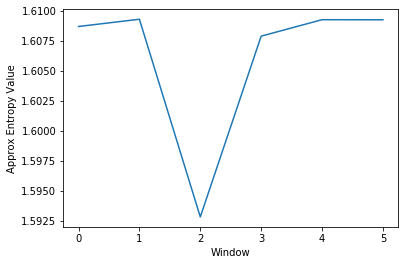

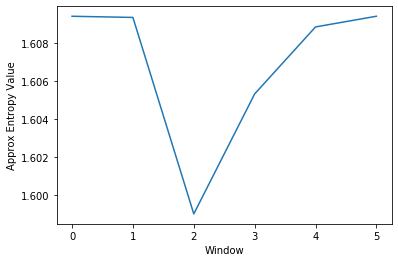

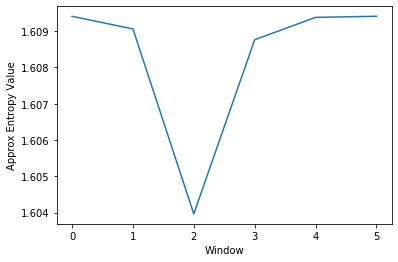

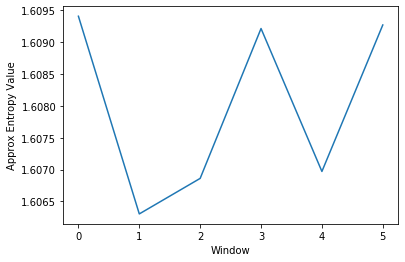

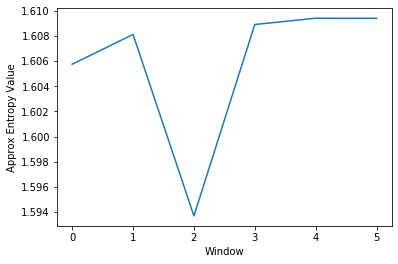

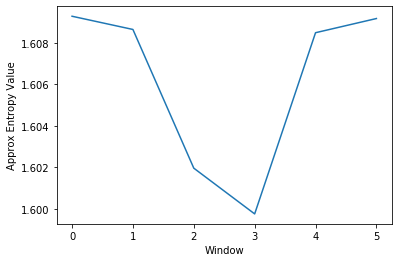

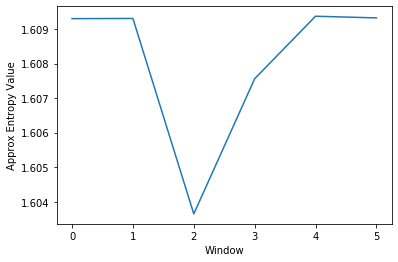

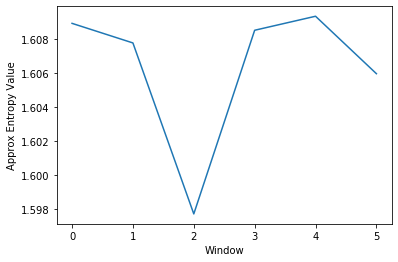

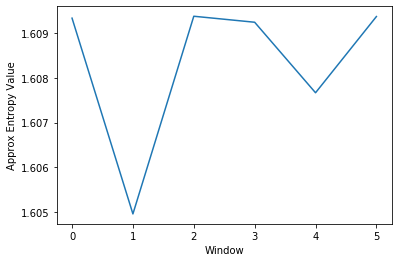

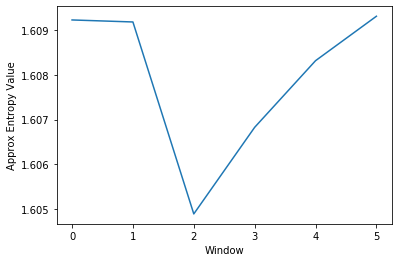

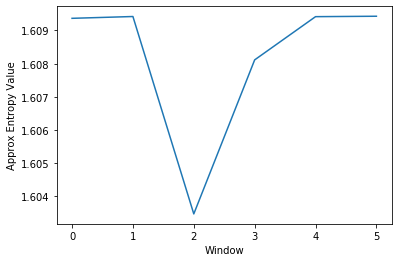

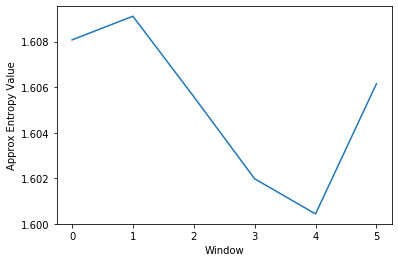

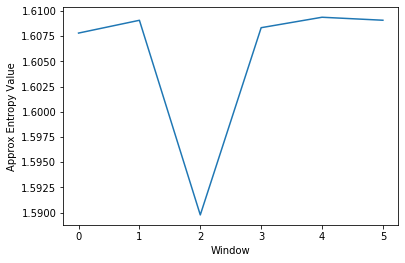

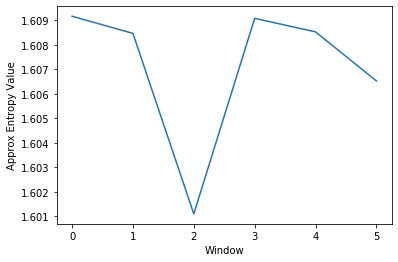

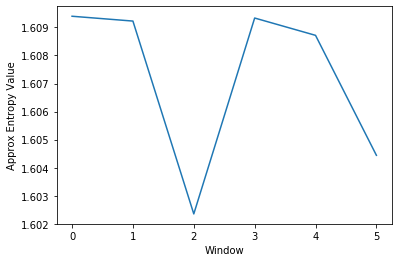

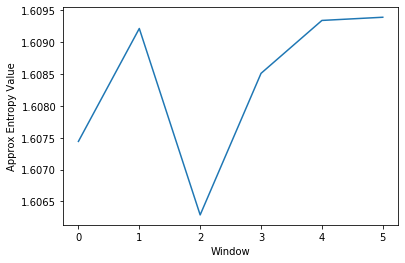

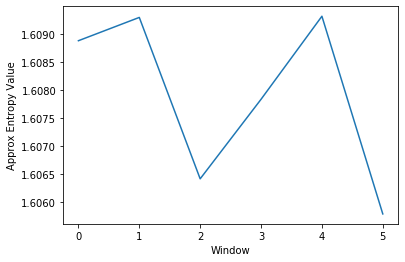

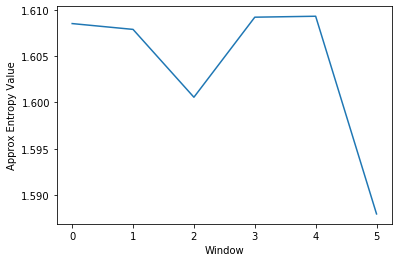

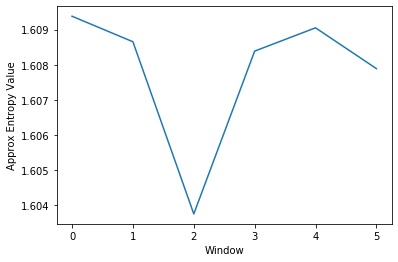

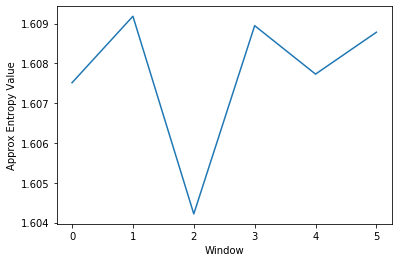

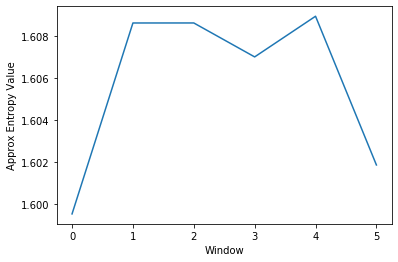

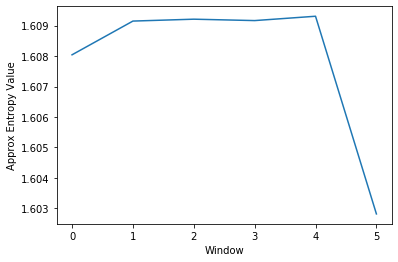

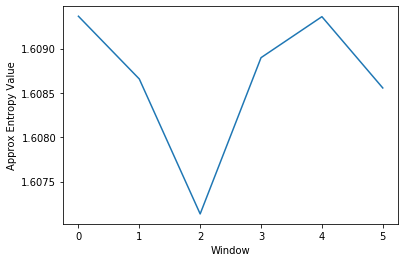

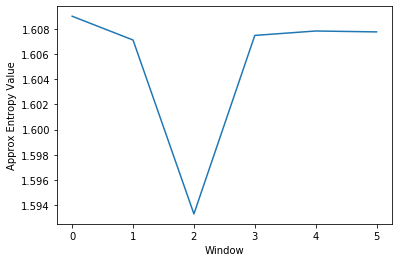

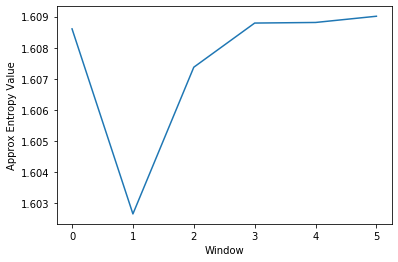

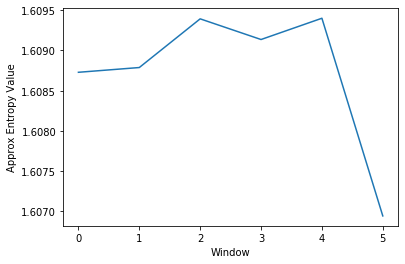

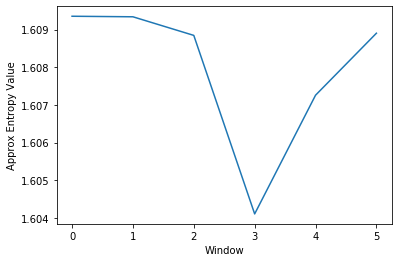

In [32]:
#Windowed Entropy Feature 
y = []
output_entropy = []
ordered_cgm = []
for j in range(0,33):
    for i in range(1):
        temp = []
        temp1 = []
        c = CGMData_b.iloc[j]
        if CGMData_b.isnull().iloc[j,i] == False:
            y.append(c[i])
        for m in range(len(c)-1,-1,-1):
            temp.append(c[m])
        y_array = np.array(temp)
        ordered_cgm.append(y_array)
        #print(y_array)
        
for i in range(len(ordered_cgm)):
    entropy_arr = []
    #print(np.asarray(ordered_cgm)[i][1:])
    for j in range(1, 30, 5):
        s = scipy.stats.entropy(np.asarray(ordered_cgm)[i, j:j+5])
        #print(s)
        entropy_arr.append(s)
    output_entropy.append(np.amin(np.asarray(entropy_arr)))
    #print(entropy_arr)    
    plt.plot(entropy_arr)
    plt.xlabel('Window')
    plt.ylabel('Approx Entropy Value')
    plt.show()

#print(output_entropy)

In [18]:
#Creating Feature Matrix

Feature_Matrix = []

# Creating Transpose to get matrix columsn for each feature.

#Velocity w.r.t Acc
FinalMaxPoint_ = np.asarray(FinalMaxPoint)
FinalMaxPoint_T = FinalMaxPoint_.transpose()

Feature_Matrix.append(FinalMaxPoint_T[0])
Feature_Matrix.append(FinalMaxPoint_T[1])

#FFT - Fourrier Transform
temp_fft_ = np.asarray(temp_fft[:,1:9])
temp_fft_T = temp_fft_.transpose()

Feature_Matrix.append(temp_fft_T[0])
Feature_Matrix.append(temp_fft_T[1])
Feature_Matrix.append(temp_fft_T[2])
Feature_Matrix.append(temp_fft_T[3])
Feature_Matrix.append(temp_fft_T[4])
Feature_Matrix.append(temp_fft_T[5])
Feature_Matrix.append(temp_fft_T[6])
Feature_Matrix.append(temp_fft_T[7])

#Area Under Curve feature
Feature_Matrix.append(feature_auc)

#Lognorm distribution feature
feature_lognorm_distributed_values_ = np.asarray(feature_lognorm_distributed_values)
Feature_Matrix.append(feature_lognorm_distributed_values_)

#Coeffecient of variation
feature_COV_ = np.asarray(feature_COV)
Feature_Matrix.append(feature_COV_)

#Discrete Wavelet Transform Feature
feature_dwt_top6_T = feature_dwt_top6.transpose()

Feature_Matrix.append(feature_dwt_top6_T[0])
Feature_Matrix.append(feature_dwt_top6_T[1])
Feature_Matrix.append(feature_dwt_top6_T[2])
Feature_Matrix.append(feature_dwt_top6_T[3])
Feature_Matrix.append(feature_dwt_top6_T[4])
Feature_Matrix.append(feature_dwt_top6_T[5])

#Windowed Entropy Feature
output_entropy_ = np.asarray(output_entropy)
Feature_Matrix.append(output_entropy)

Feature_Matrix = np.asmatrix(Feature_Matrix)
Feature_Matrix_New = Feature_Matrix.transpose()
Feature_Matrix_New

matrix([[2.36000000e+02, 2.58000000e+02, 5.57963196e+00, 2.00829428e+00,
         1.67902510e+00, 1.07592323e+00, 8.00772636e-01, 8.56779939e-01,
         6.62282582e-01, 6.10420422e-01, 4.01720202e-02, 3.25827320e+01,
         1.28081440e+00, 6.59293776e-01, 5.46604766e-01, 4.89188097e-01,
         3.71373599e-01, 2.07534387e-01, 1.50659893e-01, 1.59535165e+00],
        [3.24000000e+02, 3.49000000e+02, 2.40000000e-02, 2.40000000e-02,
         2.40000000e-02, 2.40000000e-02, 2.40000000e-02, 2.40000000e-02,
         2.40000000e-02, 2.40000000e-02, 1.04166335e-01, 1.29813173e+03,
         1.28081440e+00, 2.57186953e-01, 3.00800980e-01, 3.69514290e-01,
         3.29081347e-01, 2.38456320e-01, 2.34308484e-01, 1.60634042e+00],
        [2.48000000e+02, 2.69000000e+02, 4.82159456e+00, 1.01955467e+00,
         1.02877207e+00, 4.76629029e-01, 4.31620055e-01, 4.76248971e-01,
         3.51420010e-01, 3.13516246e-01, 5.22938375e-02, 3.21541558e+02,
         1.28081440e+00, 5.09968372e-02, 5.454823

Feature matrix from the above feature extraction methods is joined with Feature_matrix from FFT and DWT

In [ ]:
Feature_Matrix_New = np.hstack(Feature_Matrix_New,feature_matrix_fft_dwt)

In [29]:
scaler_fm = MinMaxScaler(feature_range=(0,1))
Scaled_FeatureMatrix = scaler_fm.fit_transform(Feature_Matrix_New)

In [30]:
pca = PCA(n_components=5)
reduced_matrix = pca.fit_transform(Scaled_FeatureMatrix)
reduced_matrix

array([[ 1.45586248, -0.27582086,  0.37396133, -0.40363757, -0.02683407],
       [-0.76026193,  1.41039206, -0.58899203, -0.54069655, -0.05518246],
       [ 0.64554246,  0.80814631,  0.28605413, -0.19759383, -0.02740415],
       [ 1.05259116, -0.13394608,  0.42950008, -0.17605828,  0.05435404],
       [-0.86481167,  0.24093562,  0.25081374,  0.0044762 , -0.36011693],
       [ 0.95890552,  0.14493624,  0.26758034, -0.11743914,  0.03047041],
       [ 0.24339145,  0.67785388,  0.61701737,  0.26107987,  0.10286472],
       [ 1.16716483,  0.27585453, -0.51204512,  0.07999155,  0.02726483],
       [-0.06887999, -0.26678713,  0.06377684, -0.17974892, -0.11237527],
       [-0.53656857,  0.65071252,  0.15995141,  0.35819865, -0.42737757],
       [-0.03787891,  0.18644935, -0.37591243, -0.17707942,  0.49310743],
       [ 1.53750991,  0.31814328, -0.44624779,  0.00605393, -0.11690922],
       [-0.1366337 ,  0.17236179, -0.12685249, -0.094945  , -0.0366153 ],
       [-0.49355042,  0.25760201,  0.4

In [31]:
PCA_Variance = pca.explained_variance_ratio_

sum_ = np.sum(np.asarray(pca.explained_variance_ratio_))
sum_

0.9288272180040613

In [22]:
PCA_Variance

array([0.49481346, 0.24461265, 0.08742725, 0.05718895, 0.04478491])

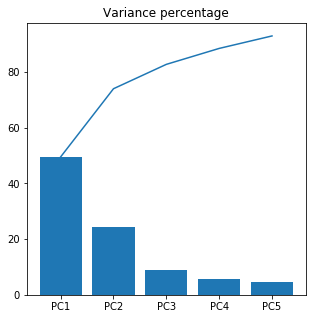

In [23]:
objects = ('PC1', 'PC2', 'PC3', 'PC4', 'PC5')
y_pos = np.arange(len(objects))

PCA_Var_Percent = PCA_Variance * 100

plt.figure(figsize=(5,5))
plt.plot(np.cumsum(PCA_Var_Percent))
plt.bar(y_pos, PCA_Var_Percent)
plt.xticks(y_pos, objects)
plt.title('Variance percentage')
plt.show()

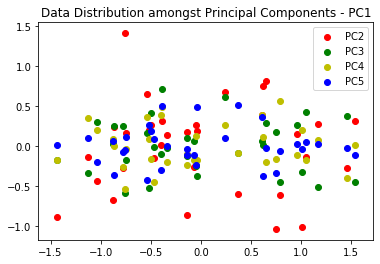

In [24]:
plt.title("Data Distribution amongst Principal Components - PC1")
plt.scatter(reduced_matrix[:,0], reduced_matrix[:,1], c='r', label='PC2')
plt.scatter(reduced_matrix[:,0], reduced_matrix[:,2], c='g', label='PC3')
plt.scatter(reduced_matrix[:,0], reduced_matrix[:,3], c='y', label='PC4')
plt.scatter(reduced_matrix[:,0], reduced_matrix[:,4], c='b', label='PC5')
plt.legend()
plt.show()

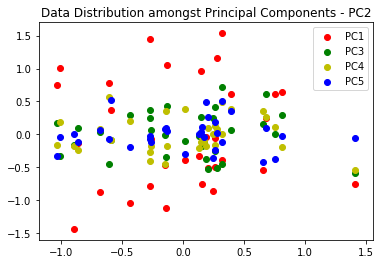

In [25]:
plt.title("Data Distribution amongst Principal Components - PC2")
plt.scatter(reduced_matrix[:,1], reduced_matrix[:,0], c='r', label='PC1')
plt.scatter(reduced_matrix[:,1], reduced_matrix[:,2], c='g', label='PC3')
plt.scatter(reduced_matrix[:,1], reduced_matrix[:,3], c='y', label='PC4')
plt.scatter(reduced_matrix[:,1], reduced_matrix[:,4], c='b', label='PC5')
plt.legend()
plt.show()

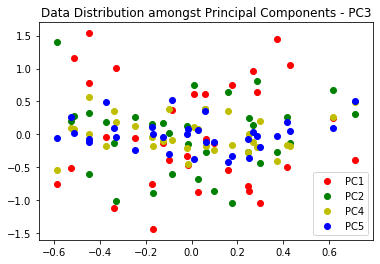

In [26]:
plt.title("Data Distribution amongst Principal Components - PC3")
plt.scatter(reduced_matrix[:,2], reduced_matrix[:,0], c='r', label='PC1')
plt.scatter(reduced_matrix[:,2], reduced_matrix[:,1], c='g', label='PC2')
plt.scatter(reduced_matrix[:,2], reduced_matrix[:,3], c='y', label='PC4')
plt.scatter(reduced_matrix[:,2], reduced_matrix[:,4], c='b', label='PC5')
plt.legend()
plt.show()

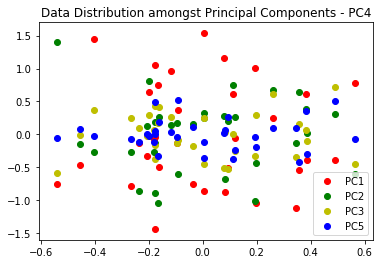

In [27]:
plt.title("Data Distribution amongst Principal Components - PC4")
plt.scatter(reduced_matrix[:,3], reduced_matrix[:,0], c='r', label='PC1')
plt.scatter(reduced_matrix[:,3], reduced_matrix[:,1], c='g', label='PC2')
plt.scatter(reduced_matrix[:,3], reduced_matrix[:,2], c='y', label='PC3')
plt.scatter(reduced_matrix[:,3], reduced_matrix[:,4], c='b', label='PC5')
plt.legend()
plt.show()

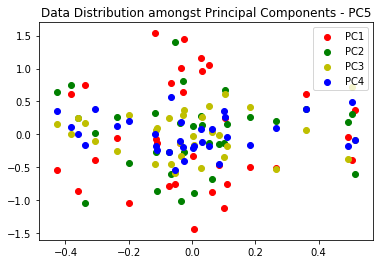

In [28]:
plt.title("Data Distribution amongst Principal Components - PC5")
plt.scatter(reduced_matrix[:,4], reduced_matrix[:,0], c='r', label='PC1')
plt.scatter(reduced_matrix[:,4], reduced_matrix[:,1], c='g', label='PC2')
plt.scatter(reduced_matrix[:,4], reduced_matrix[:,2], c='y', label='PC3')
plt.scatter(reduced_matrix[:,4], reduced_matrix[:,3], c='b', label='PC4')
plt.legend()
plt.show()